In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Histogram, Density plot, Boxplots

In [4]:
geometric_features = ['Area..ABD.', 'Area..Filled.', 'Diameter..ABD.', 'Diameter..ESD.', 'Diameter..FD.',
                      'Length','Width', 'Perimeter', 'Volume..ABD.', 'Volume..ESD.', 'Geodesic.Length', 
                      'Geodesic.Thickness']

shape_features = ['Aspect.Ratio', 'Circle.Fit', 'Circularity', 'Circularity..Hu.', 'Compactness', 
                  'Convex.Perimeter', 'Convexity', 'Fiber.Curl', 'Fiber.Straightness', 
                  'Geodesic.Aspect.Ratio', 'Roughness', 'Elongation', 'Symmetry']

optical_features = ['Edge.Gradient', 'Intensity','Sigma.Intensity', 'Sum.Intensity', 'Transparency']

environmental_features = ['gdd2', 'WaterT', 'avgdepth', 'MinDepth', 'MaxDepth', 'CLOUD_PC', 'PRECIP', 
                          'distshore', 'Exposure', 'XANGLE', 'XWAVEHT']

sampling_features = ['SITE', 'Loc', 'LAT0', 'LAT1', 'LON0', 'LON1']

biological_features = ['WhitefishDen', 'UnknwCoregonine', 'CiscoDen']

sum_features = geometric_features + shape_features + optical_features + environmental_features + sampling_features + biological_features

sum_features_drop = [feature for feature in sum_features if feature not in ['SITE', 'Loc', 'LON0','LON1']]

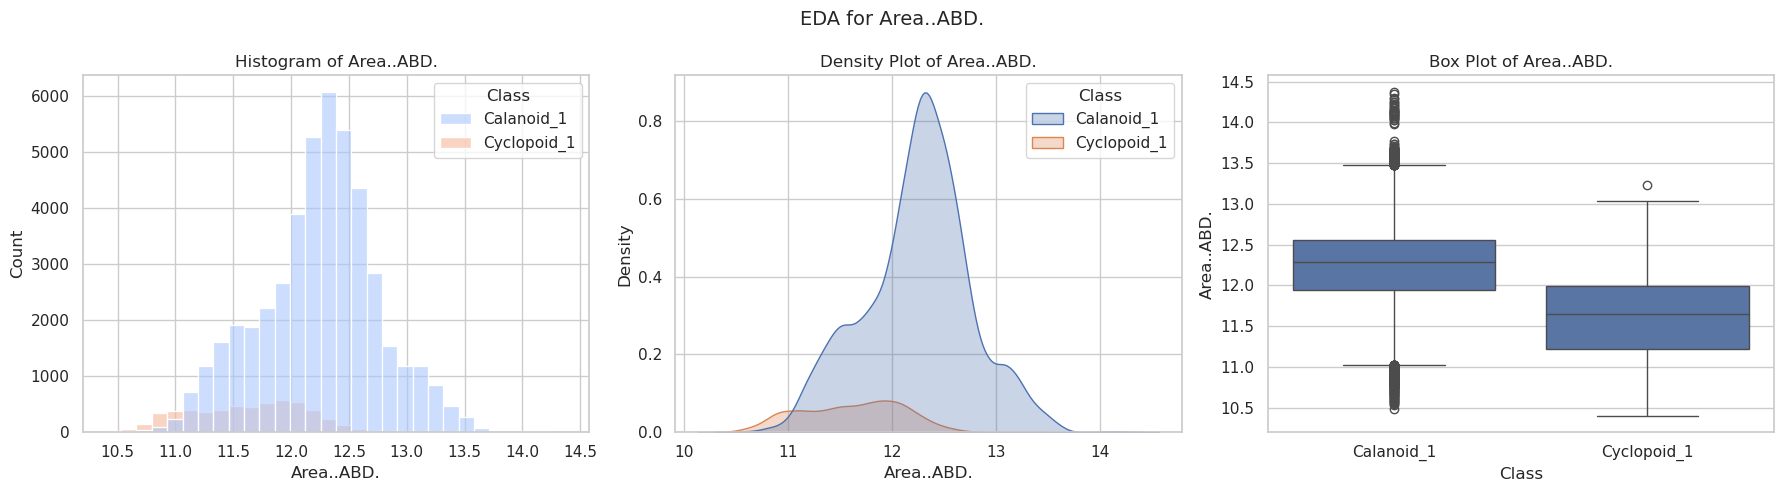

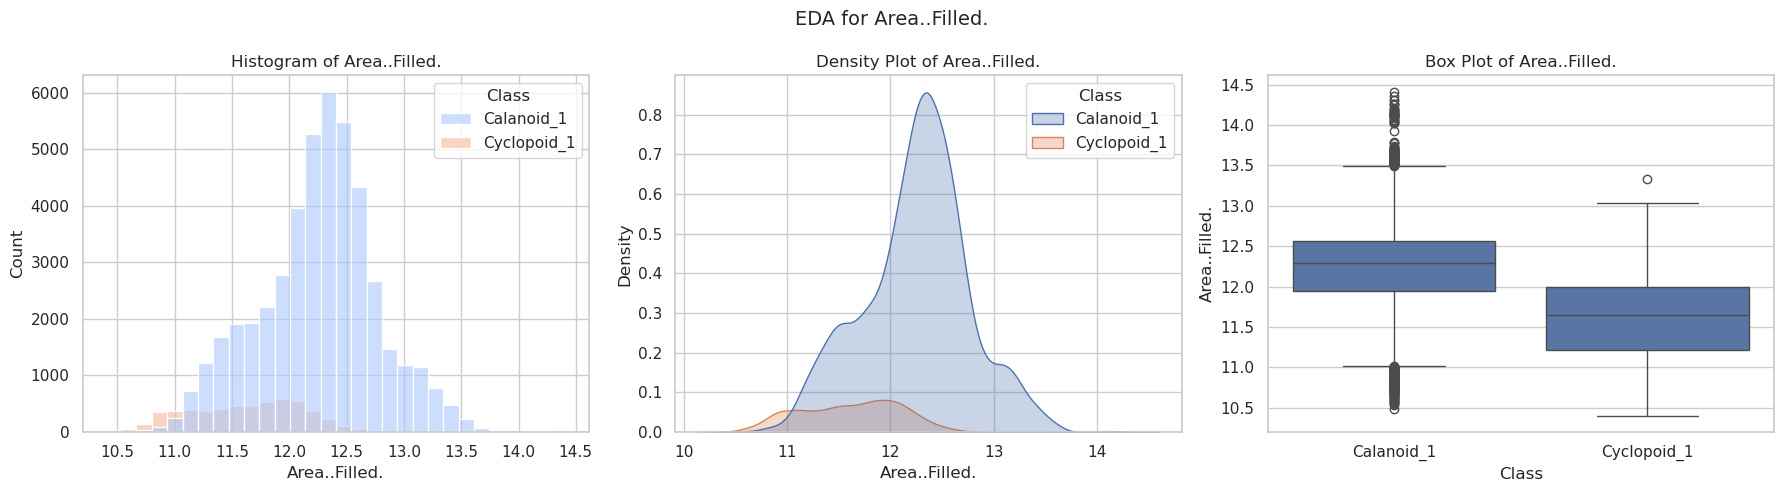

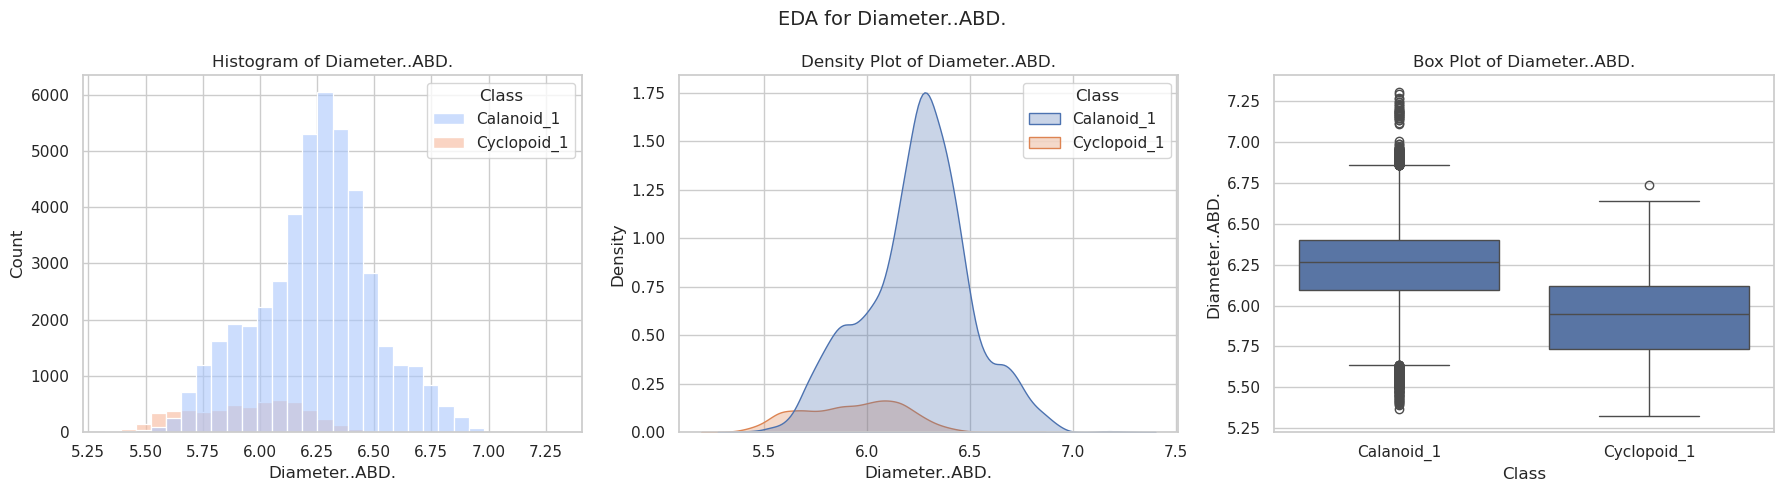

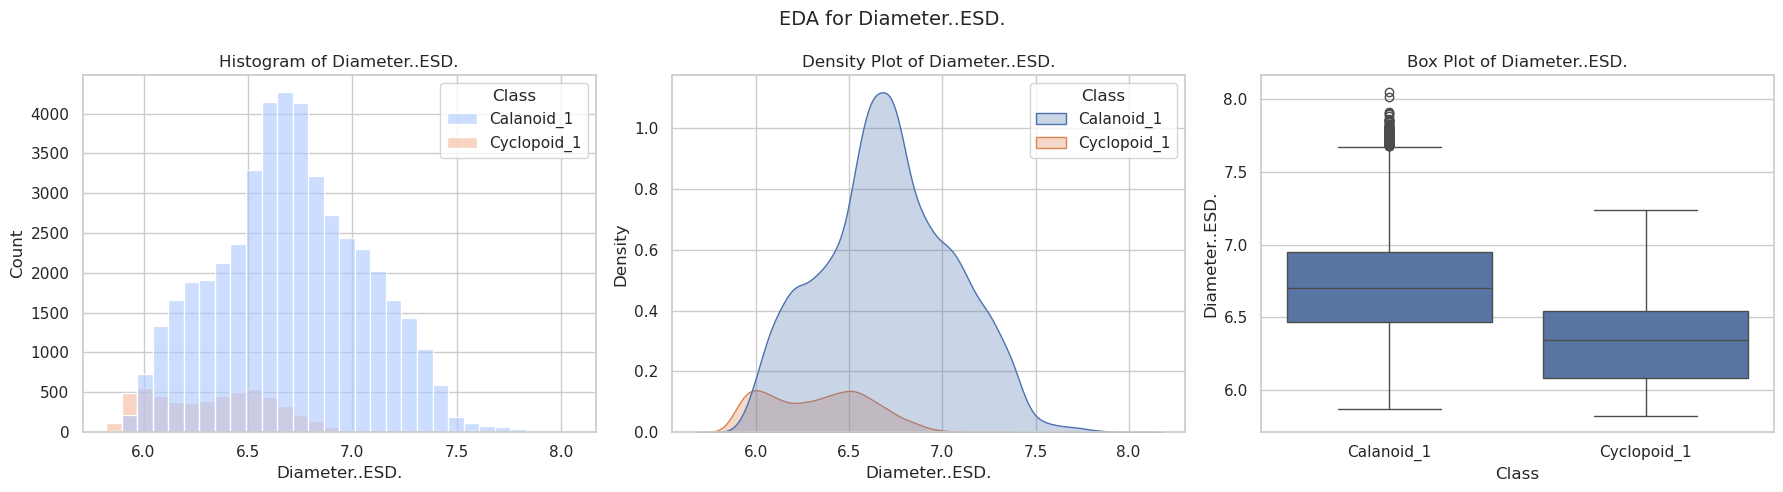

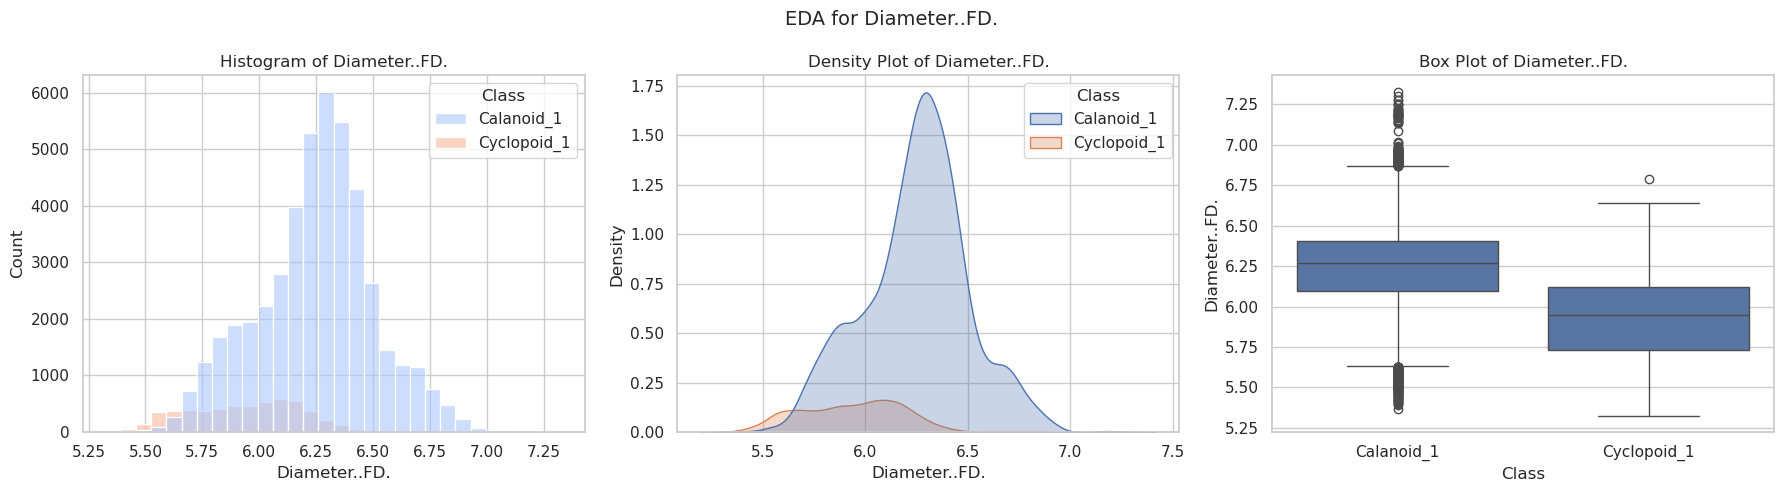

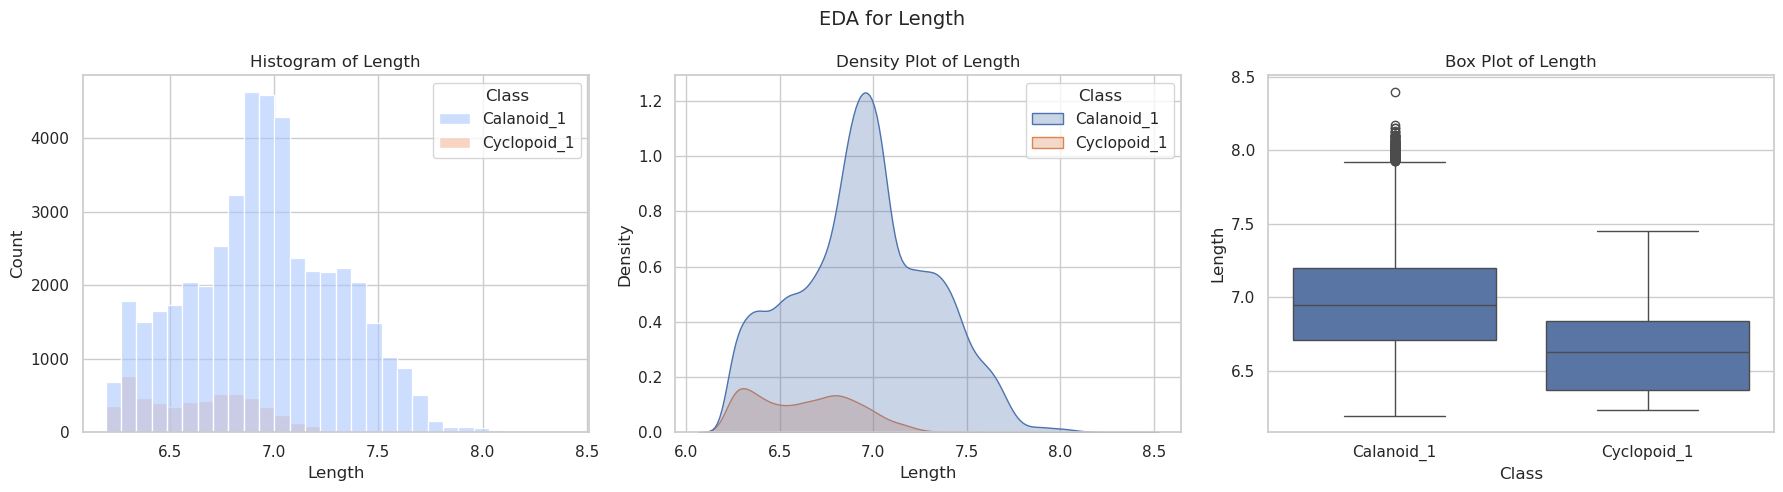

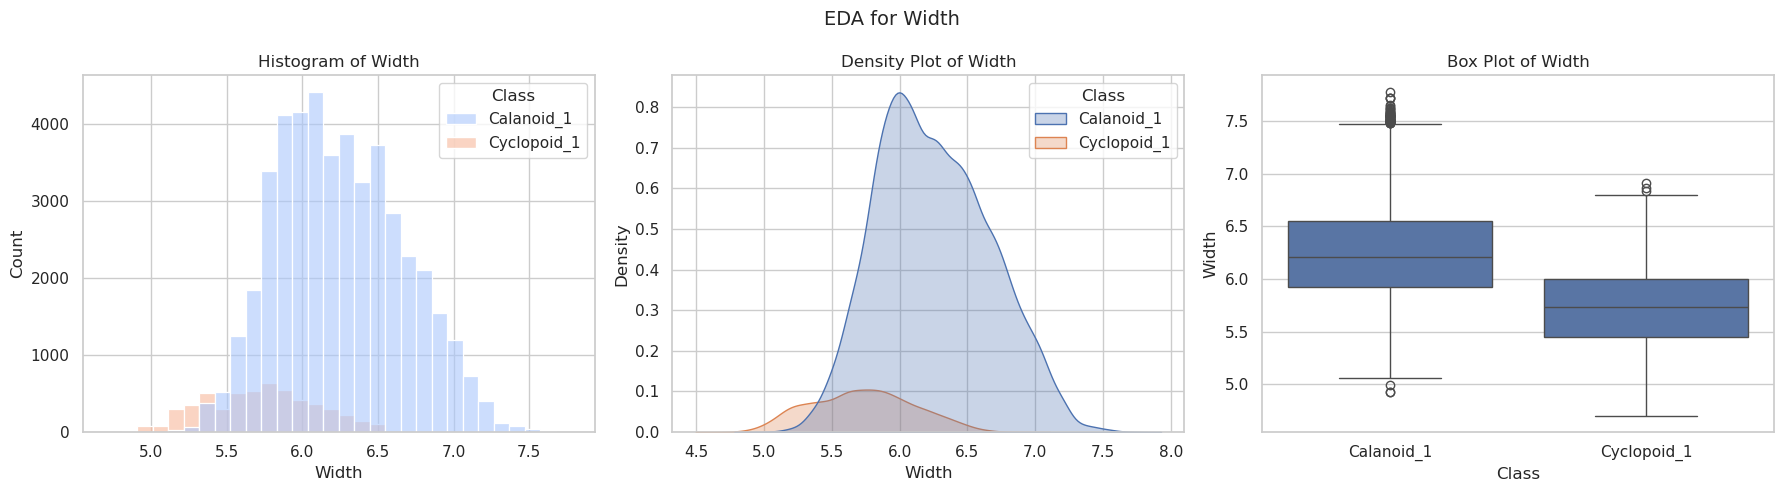

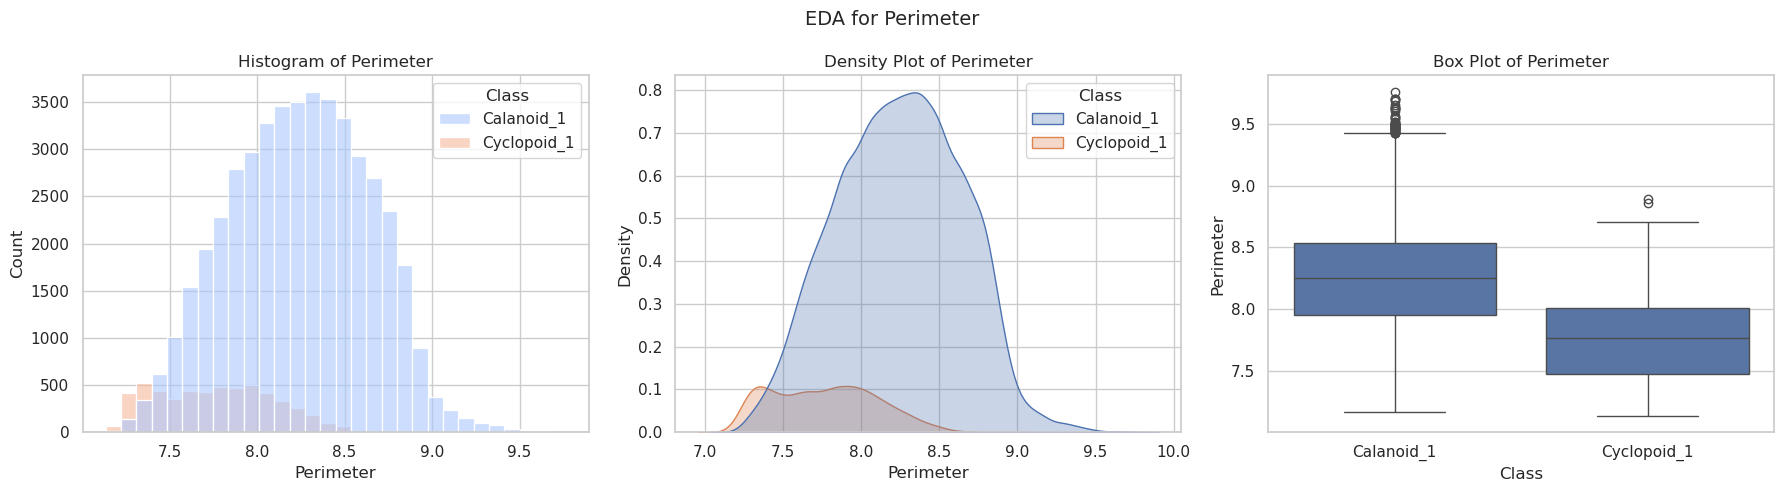

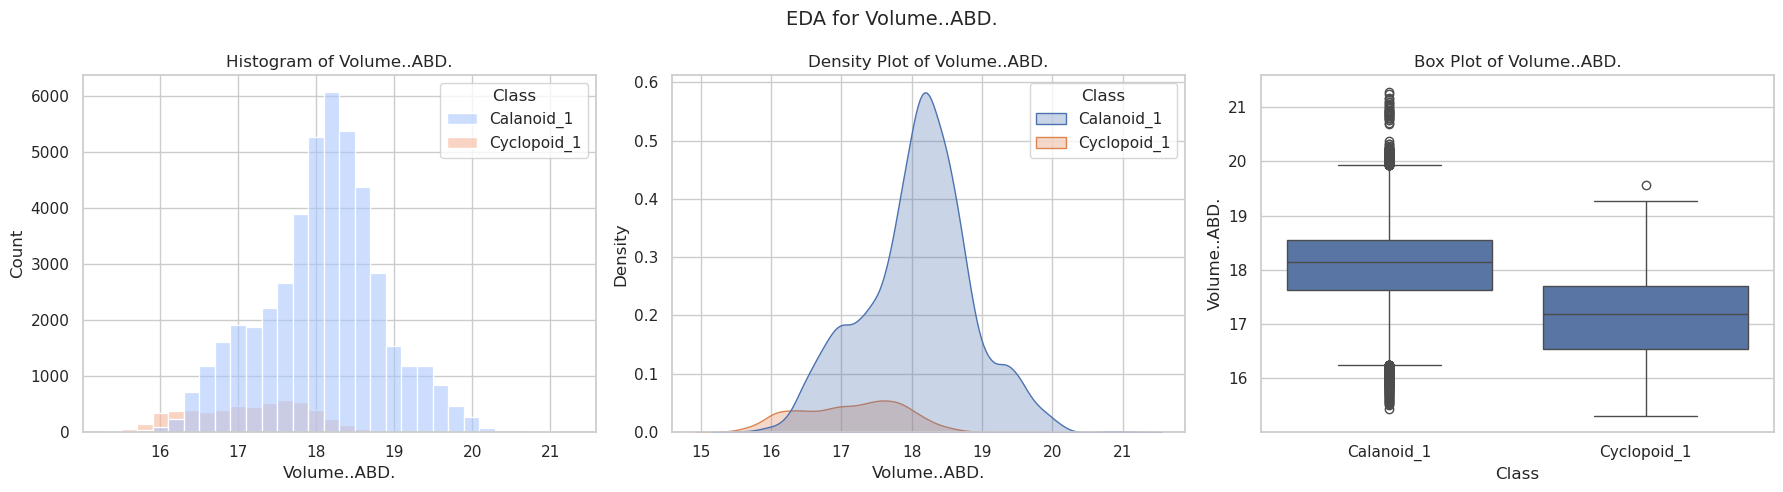

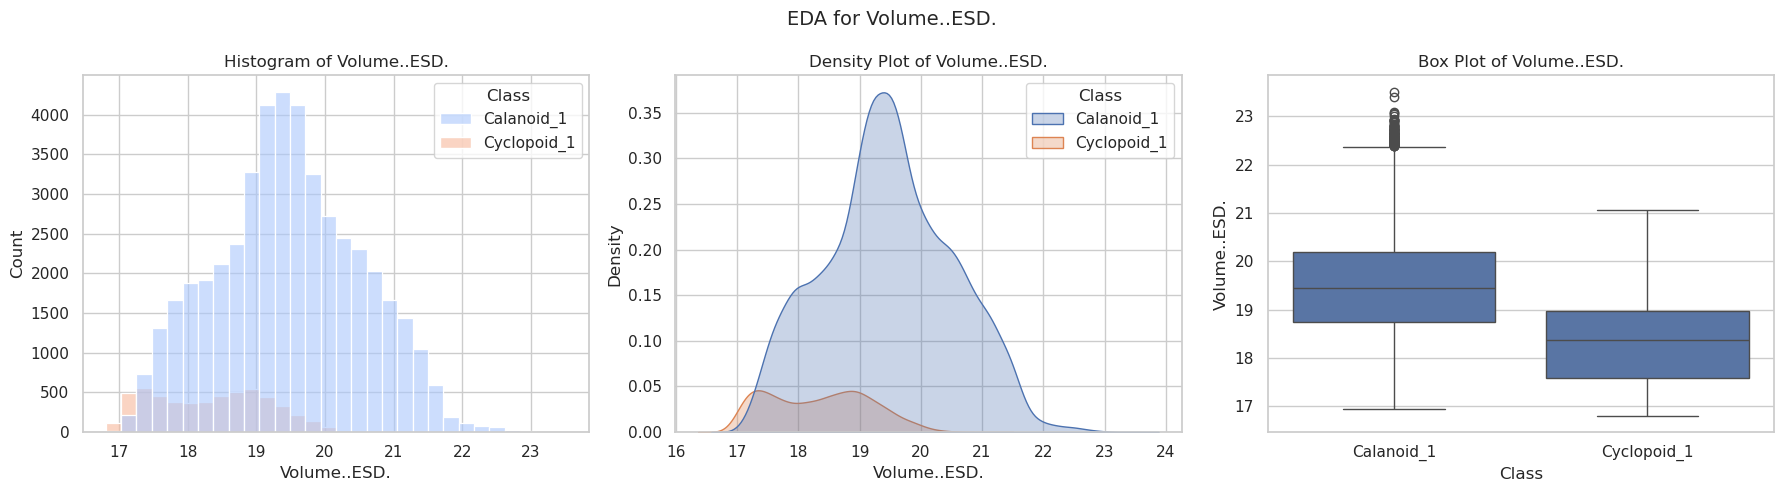

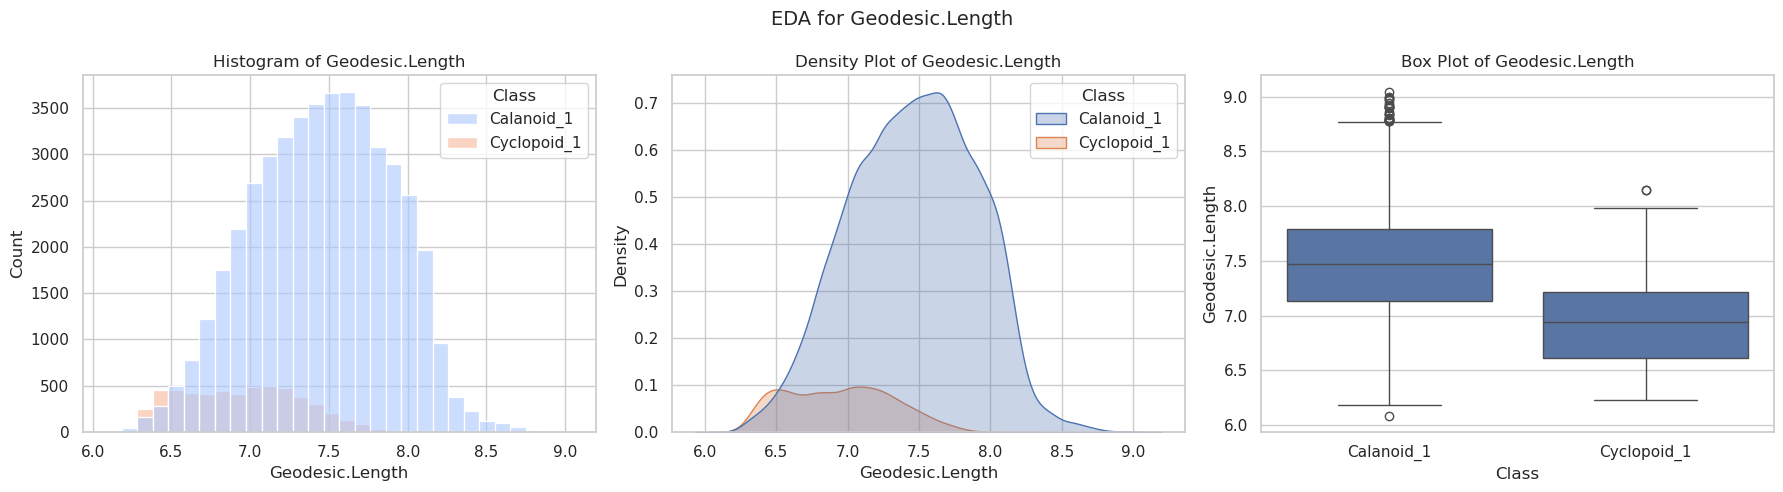

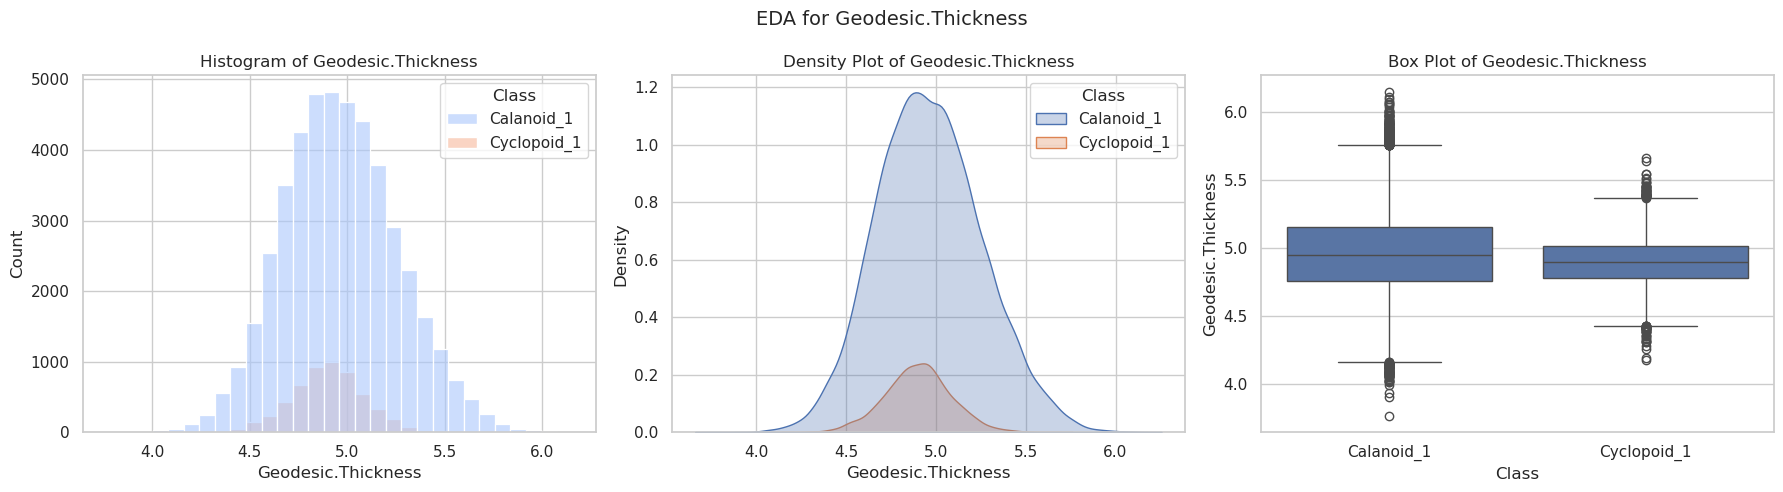

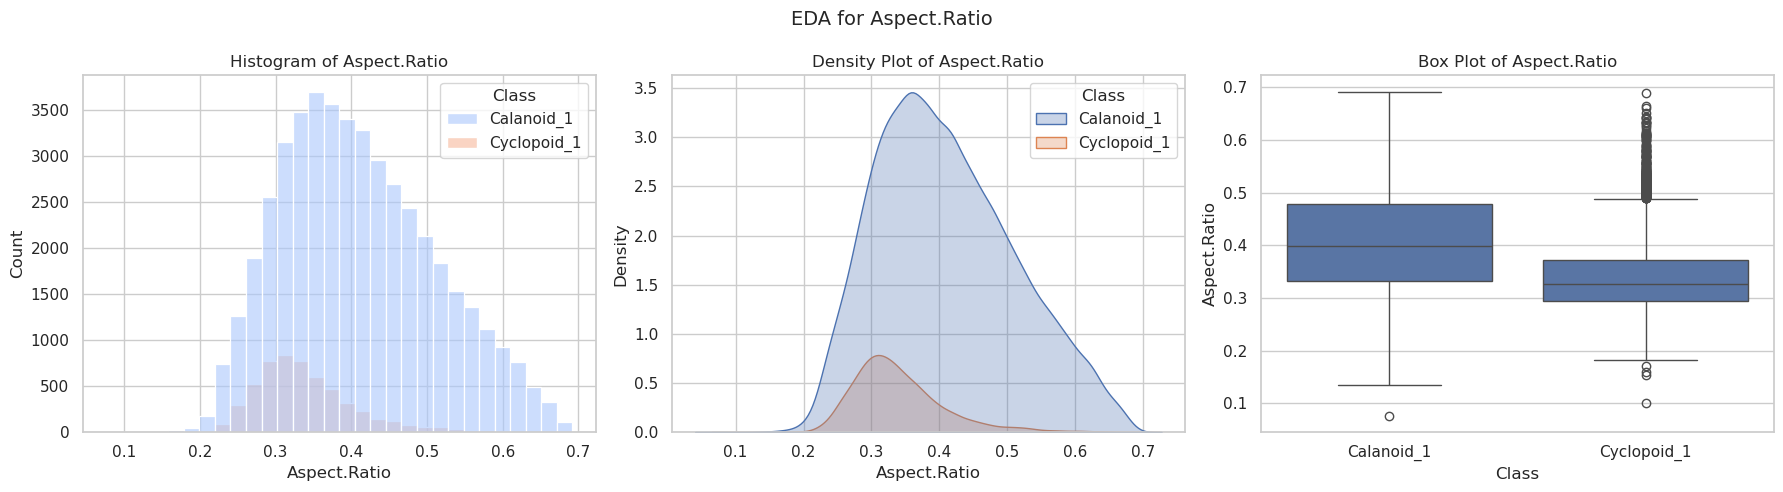

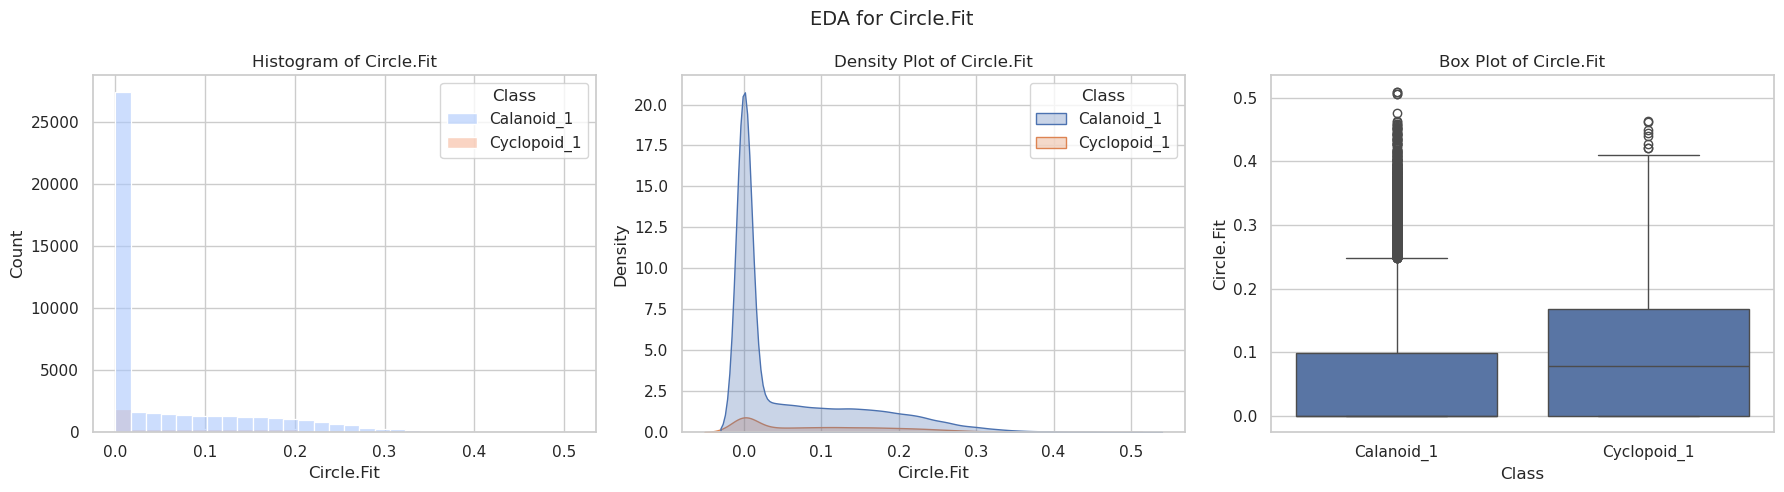

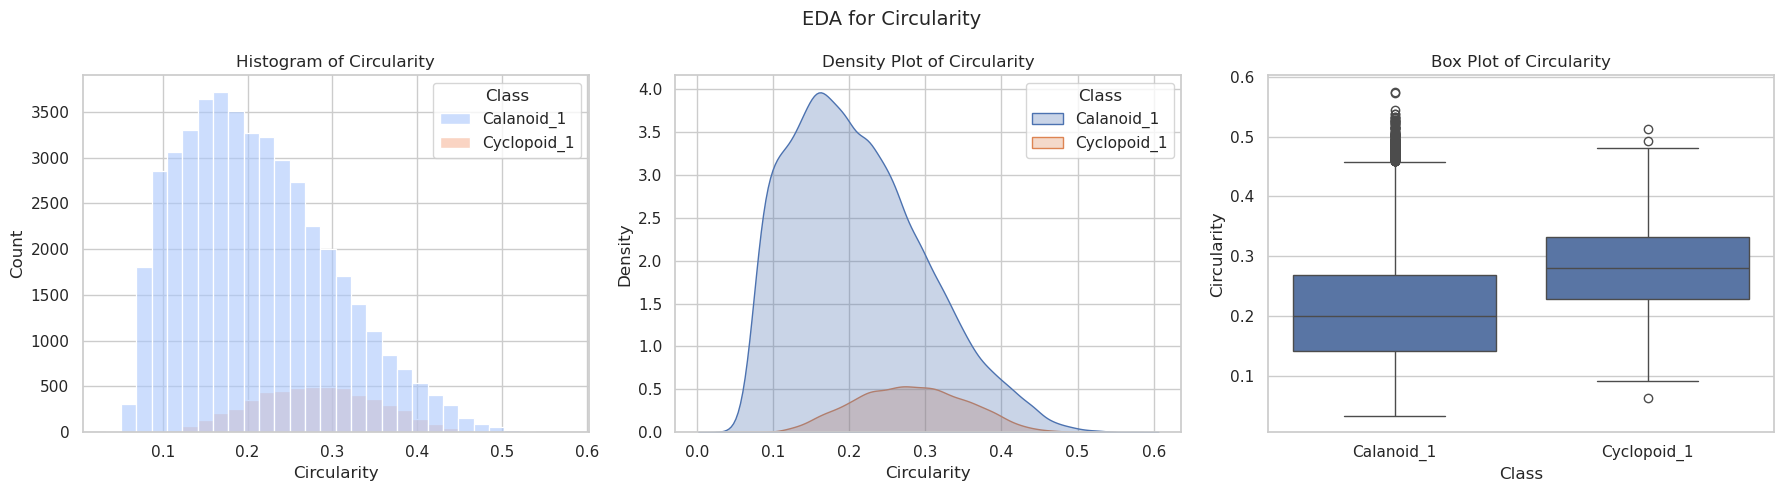

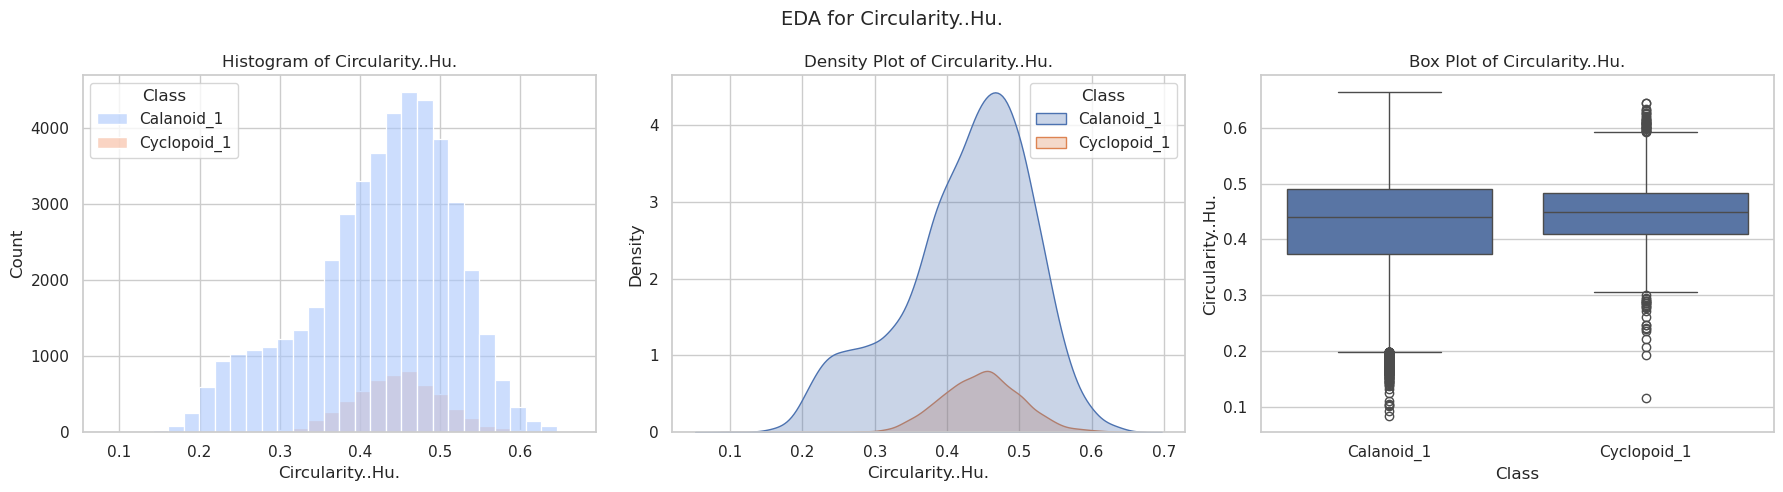

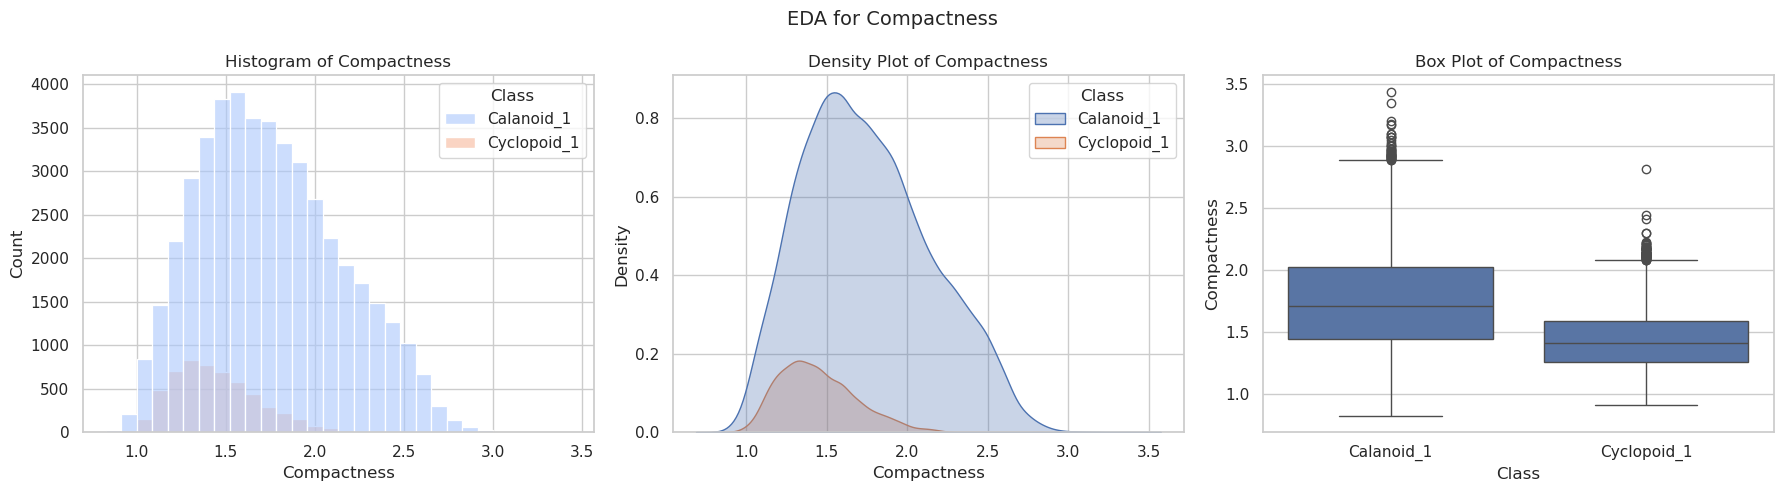

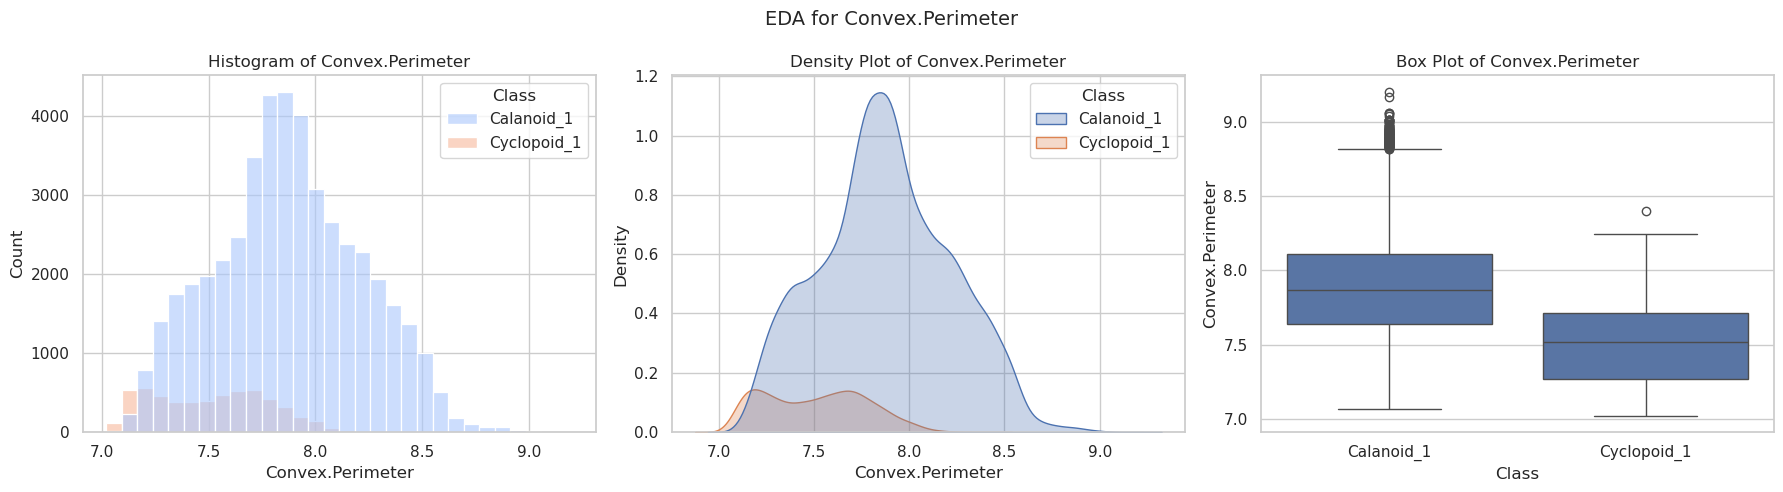

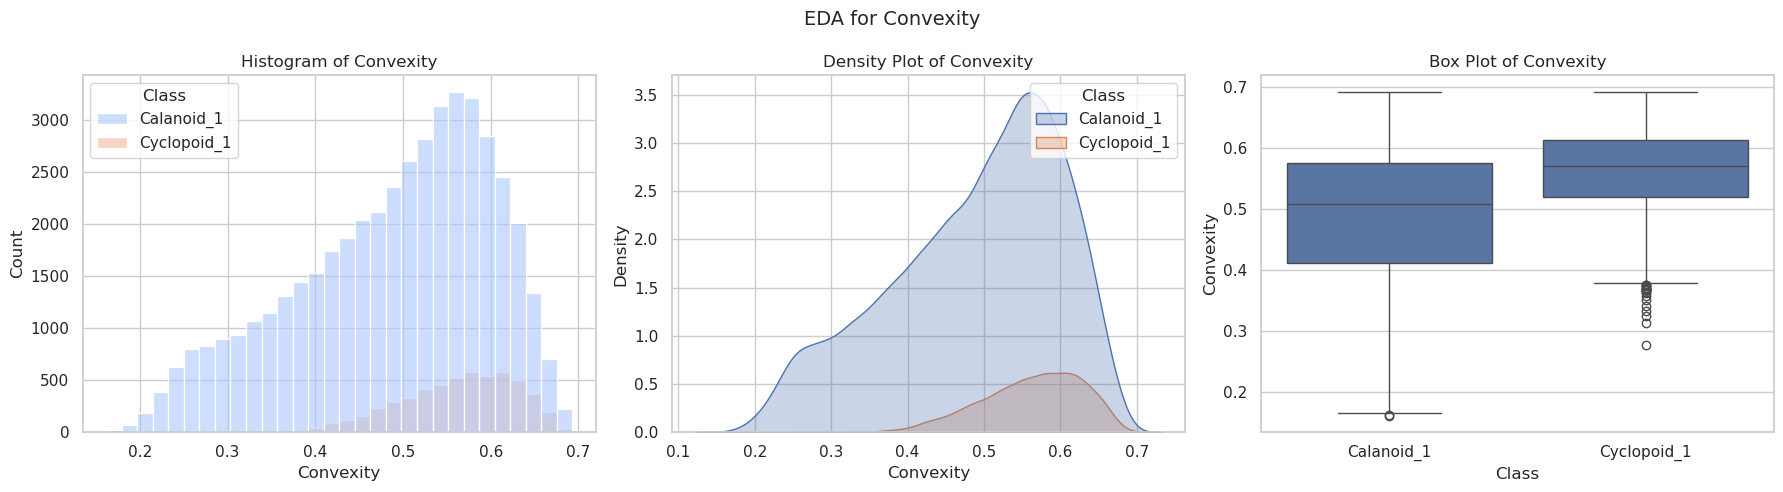

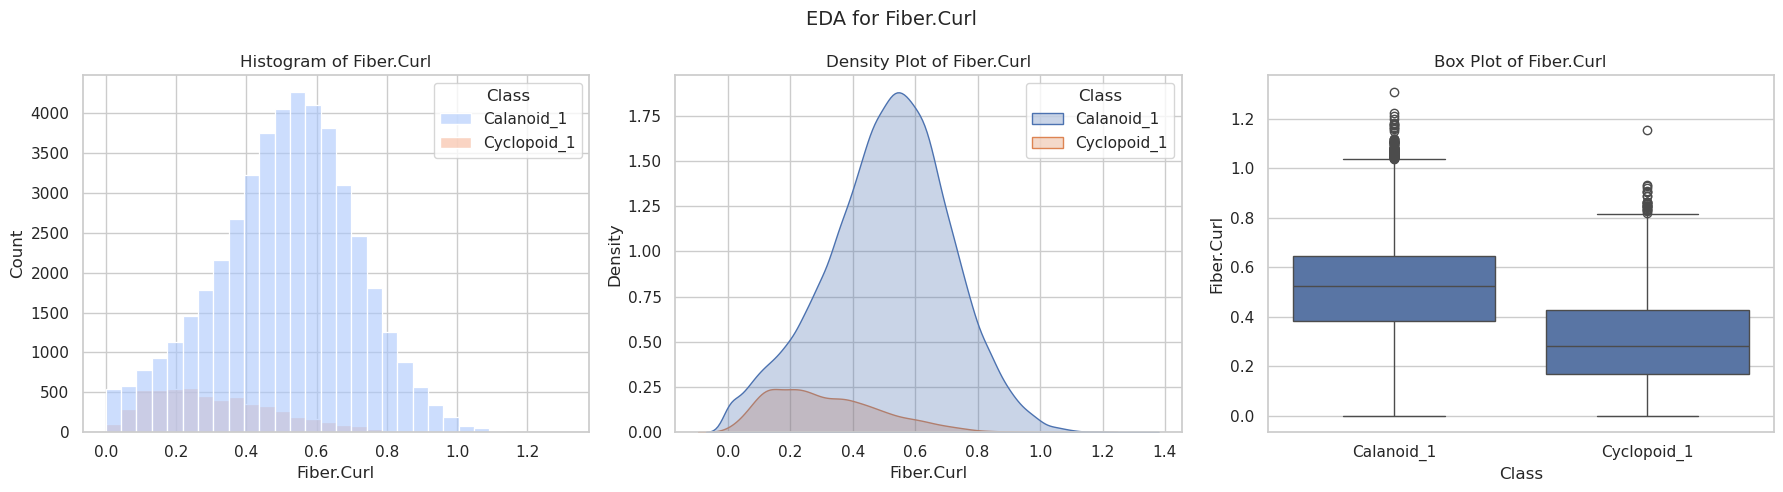

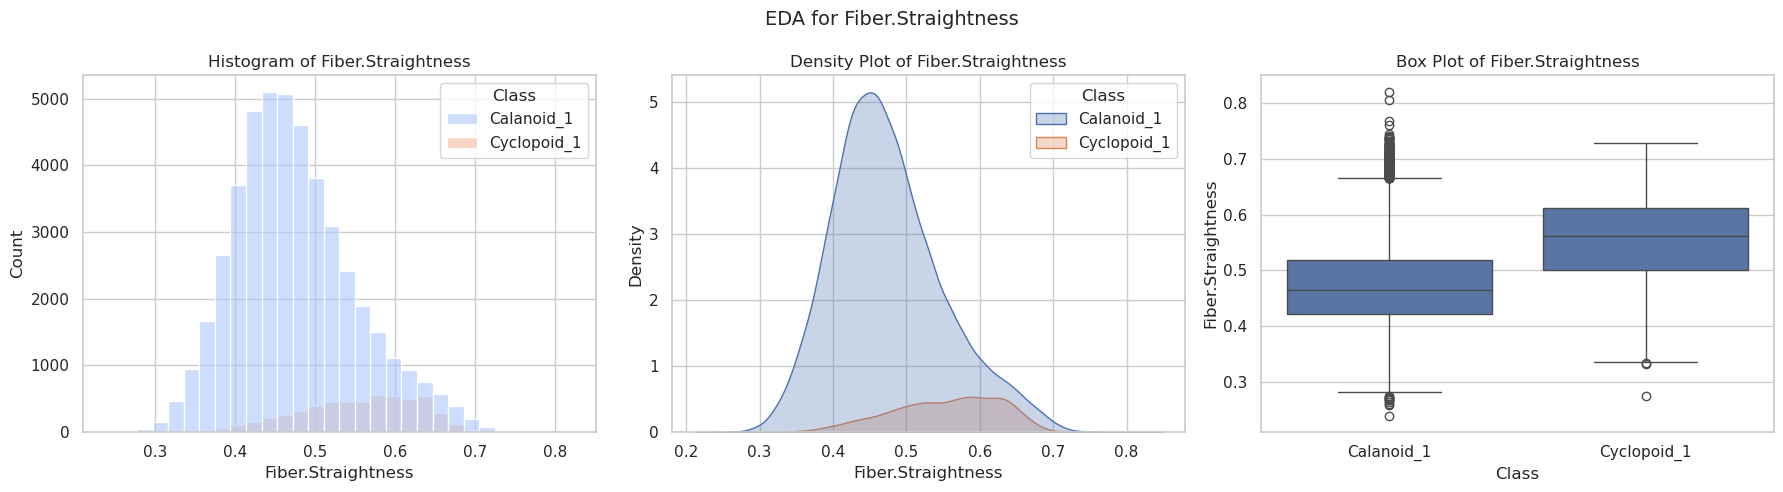

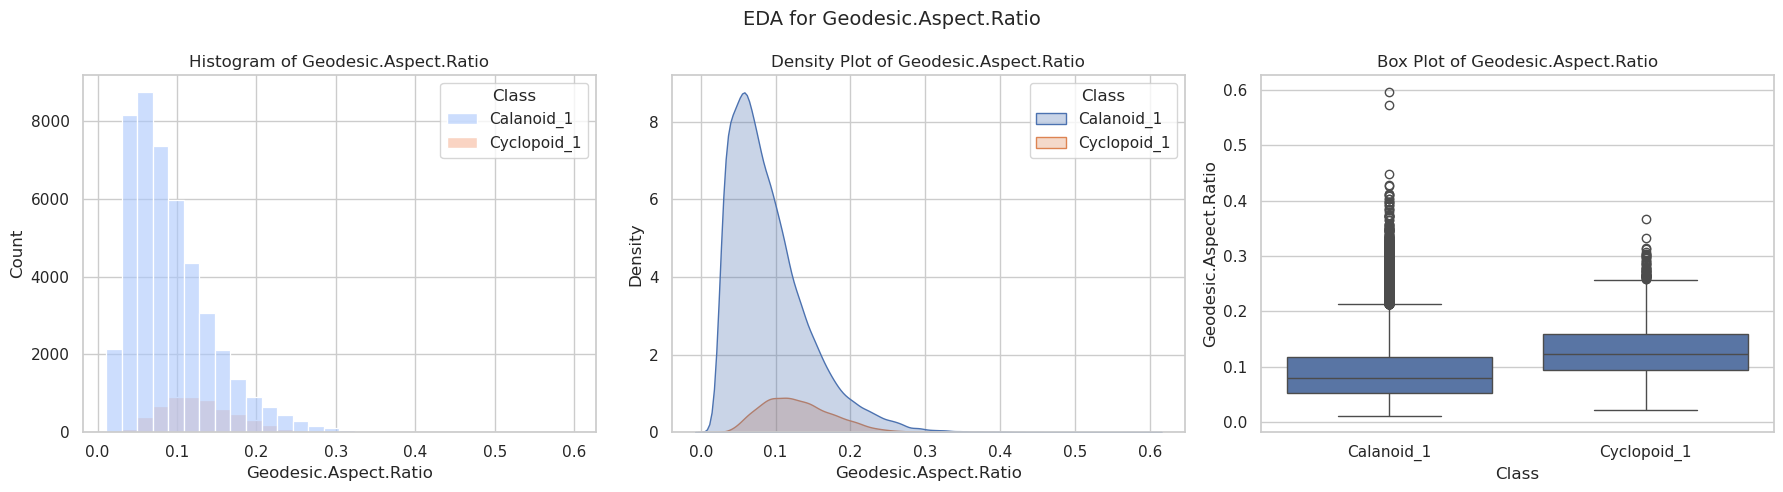

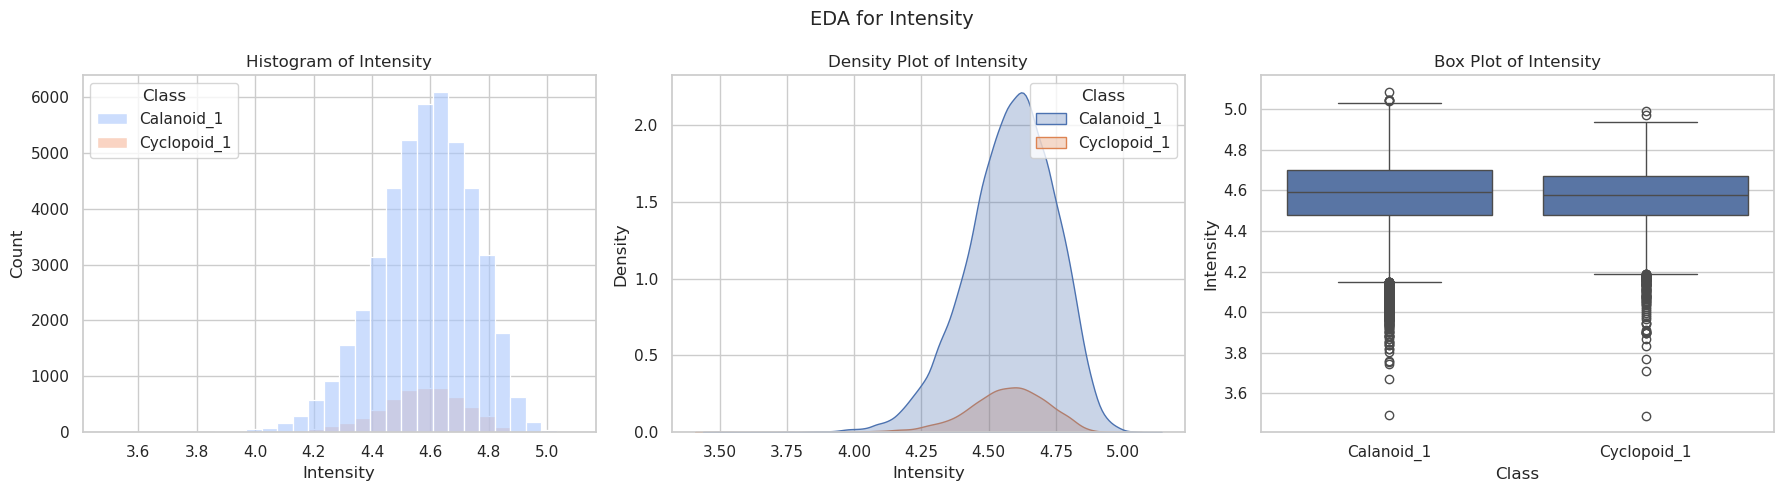

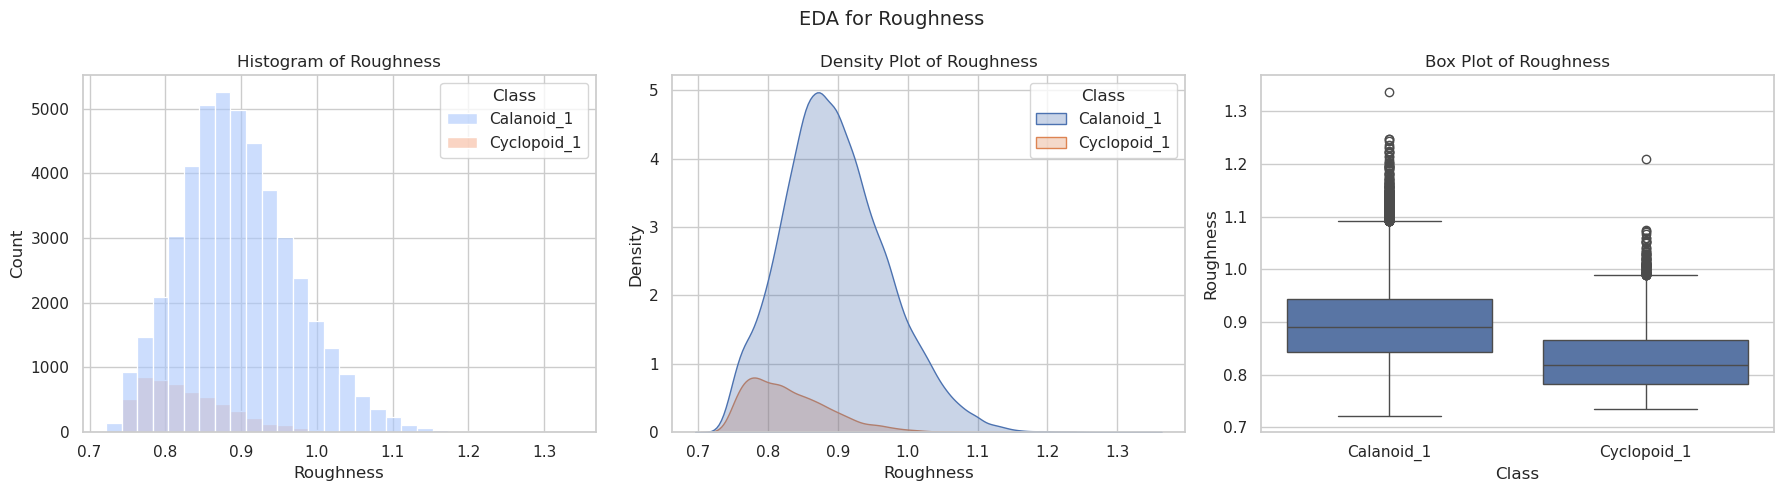

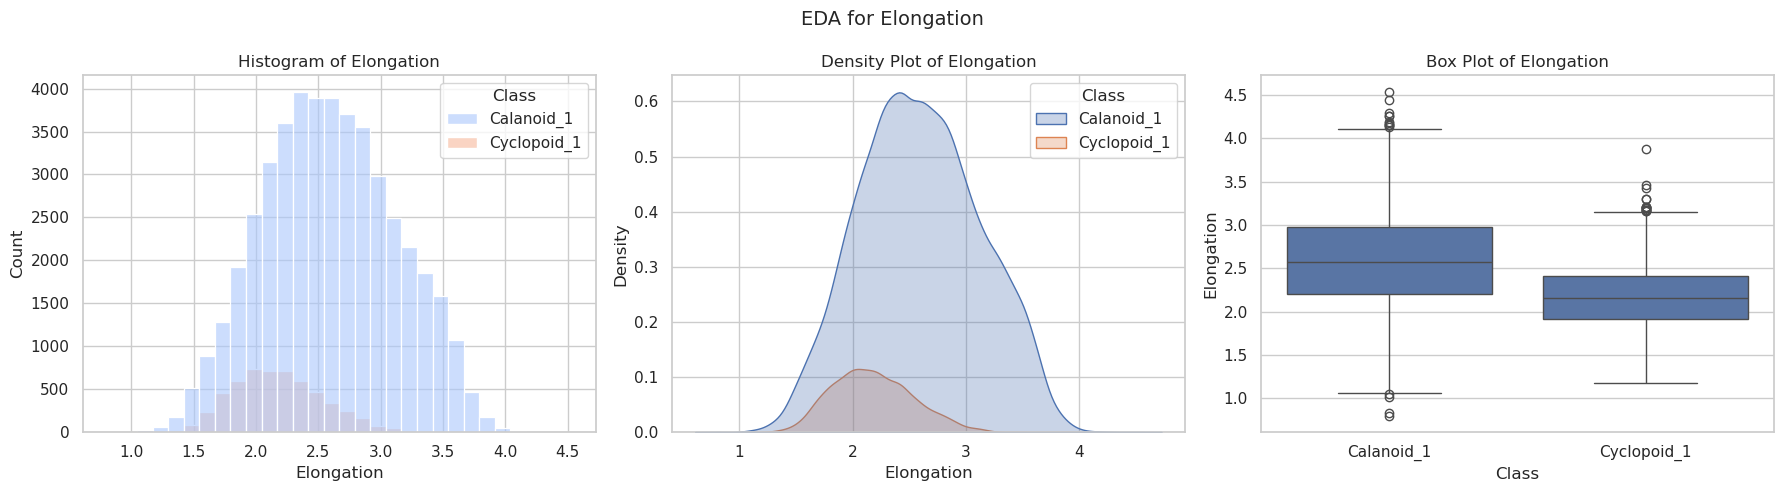

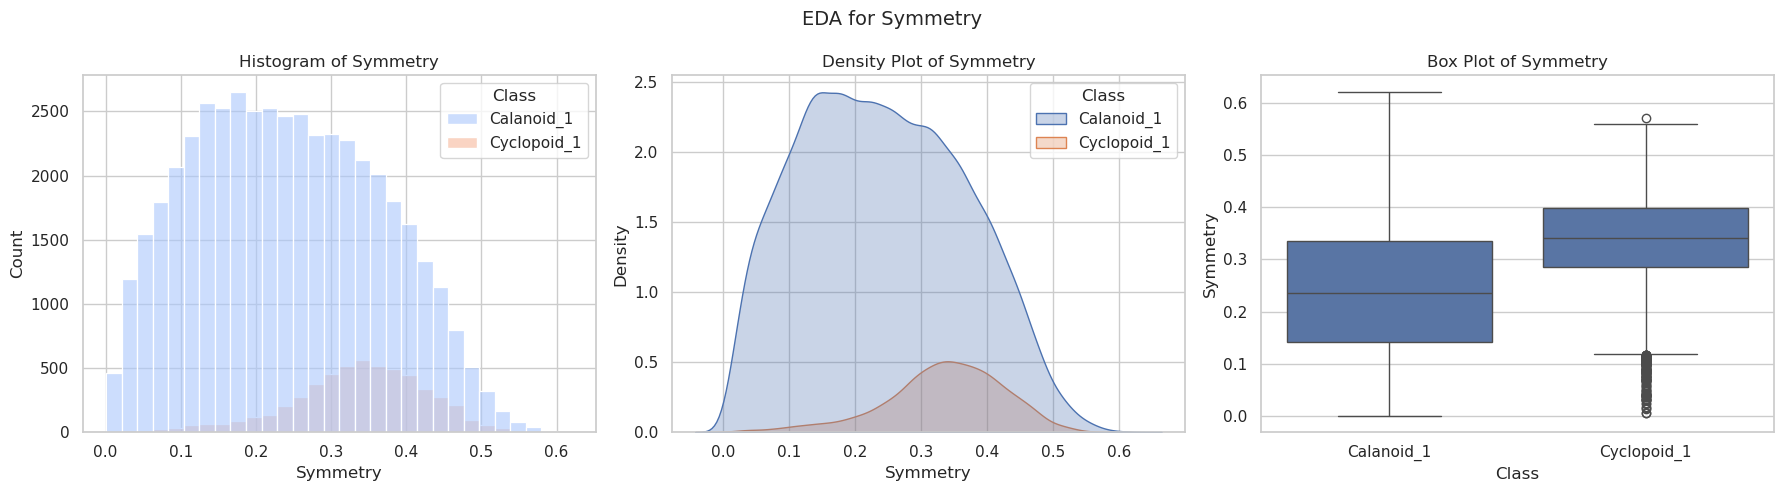

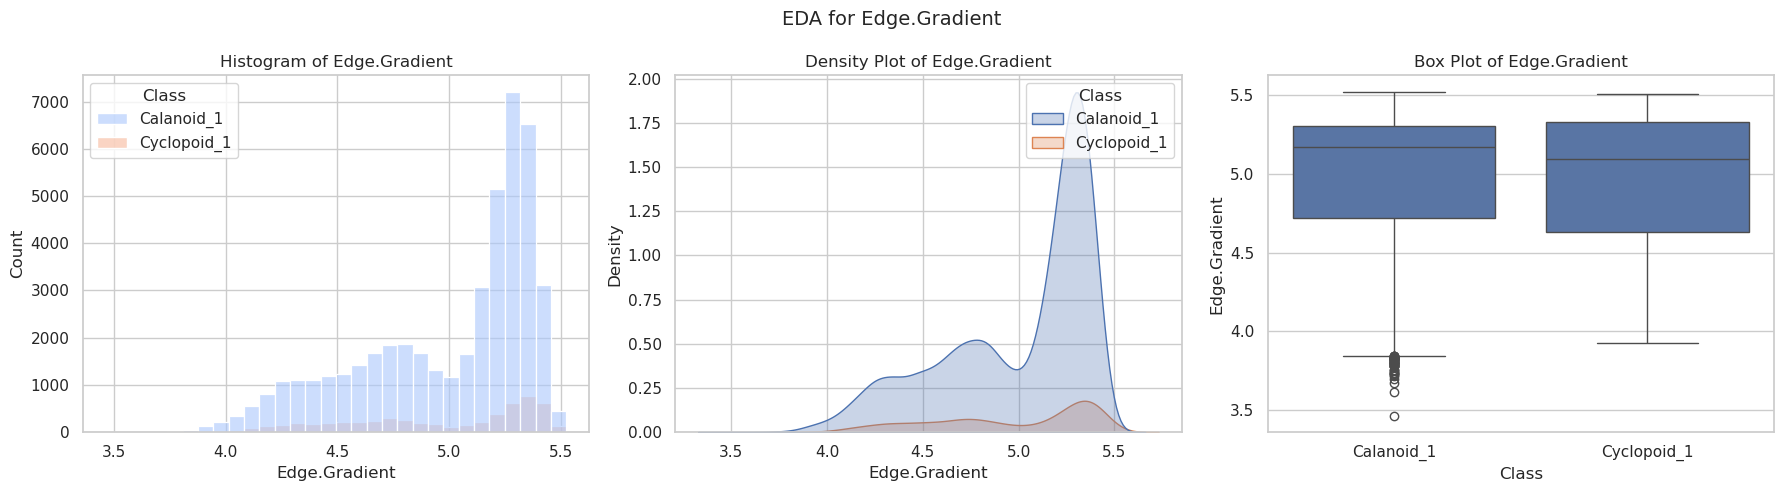

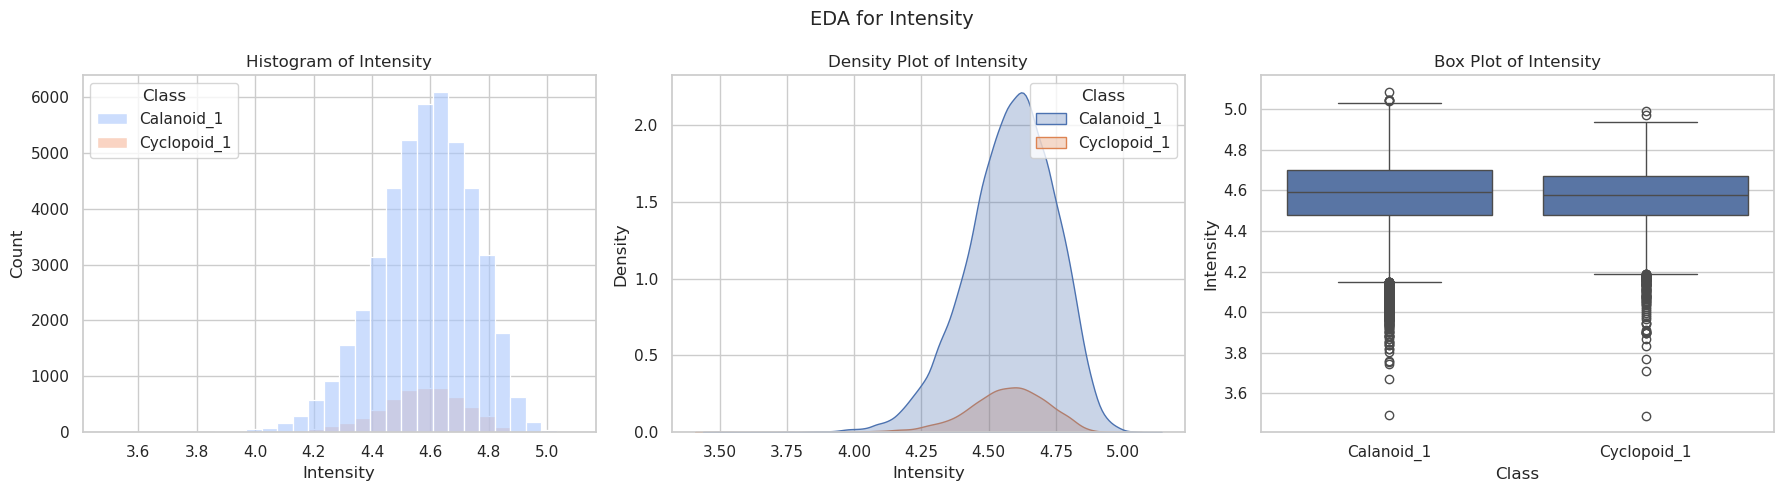

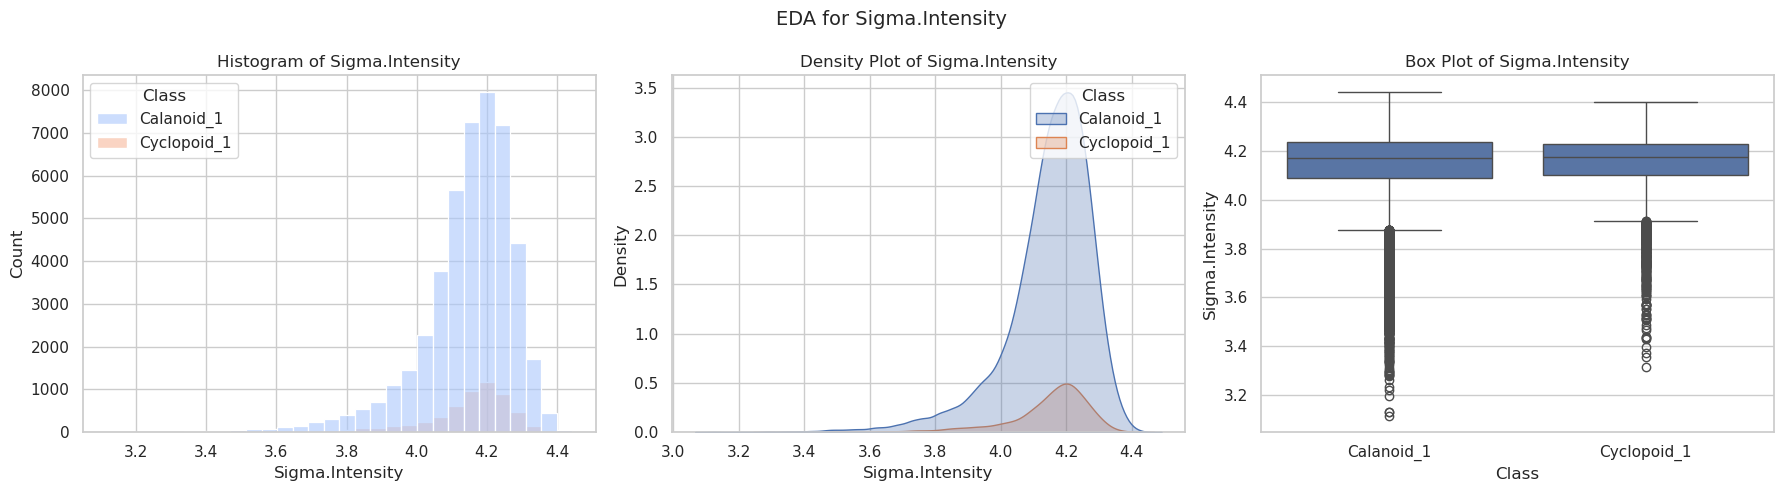

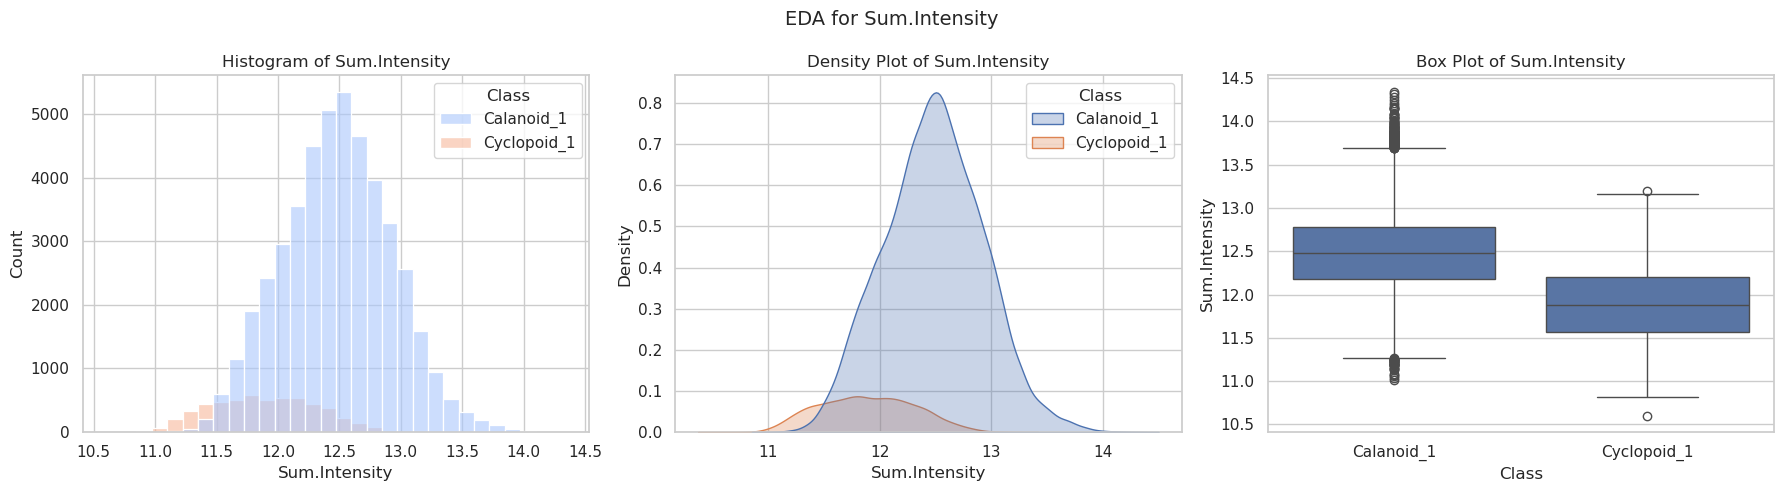

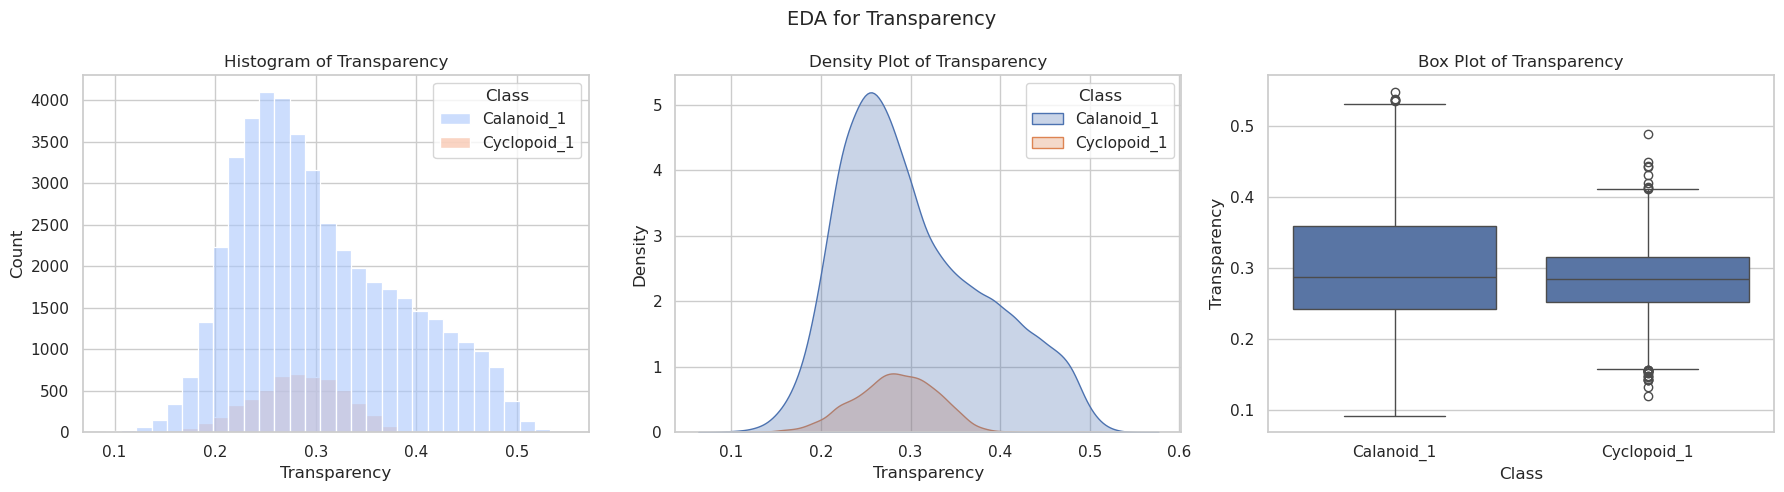

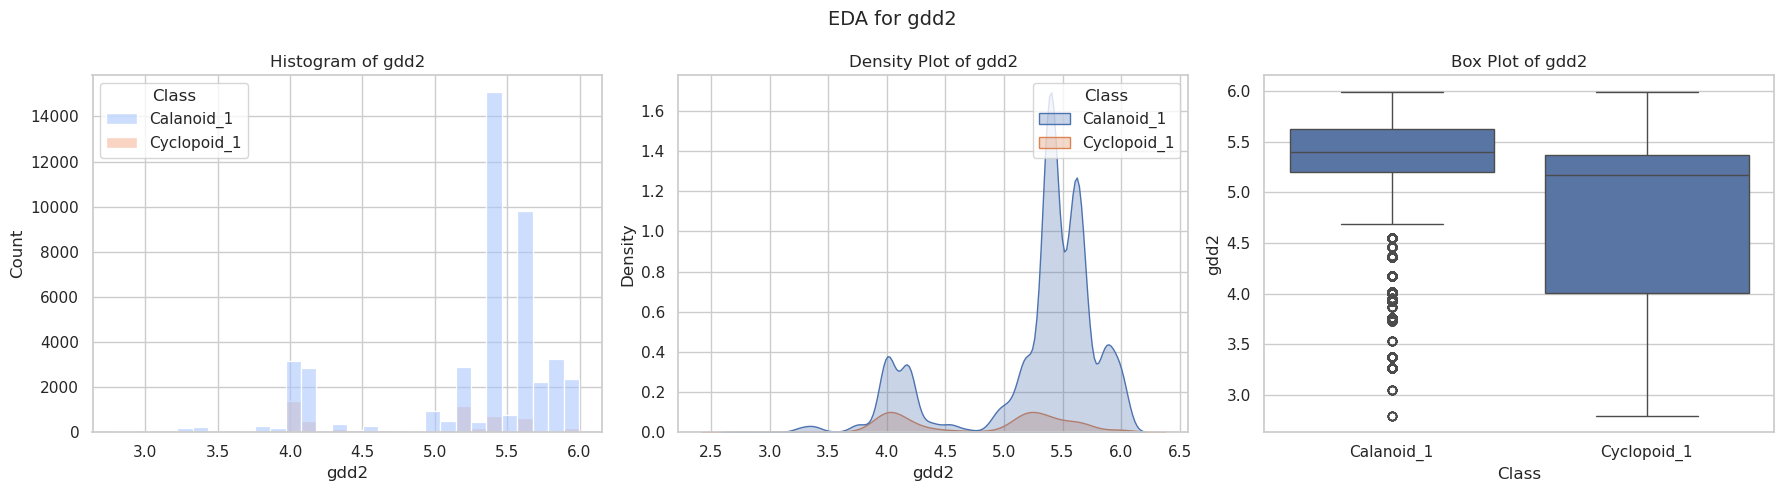

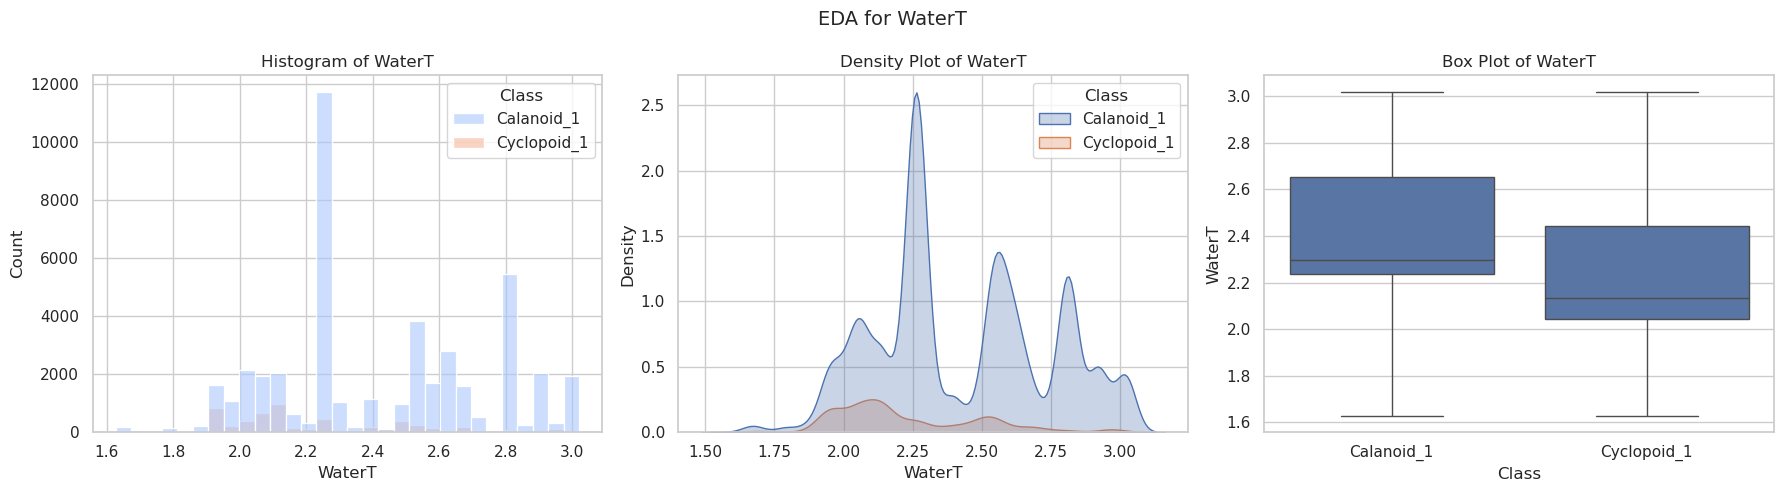

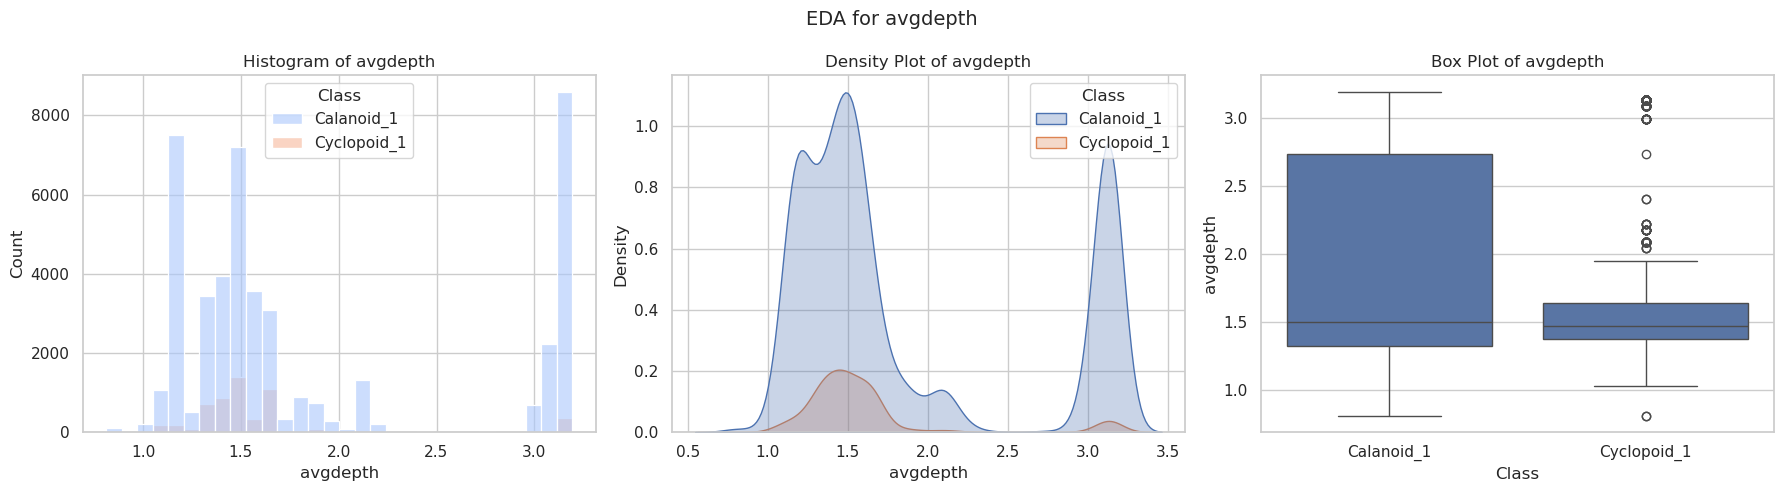

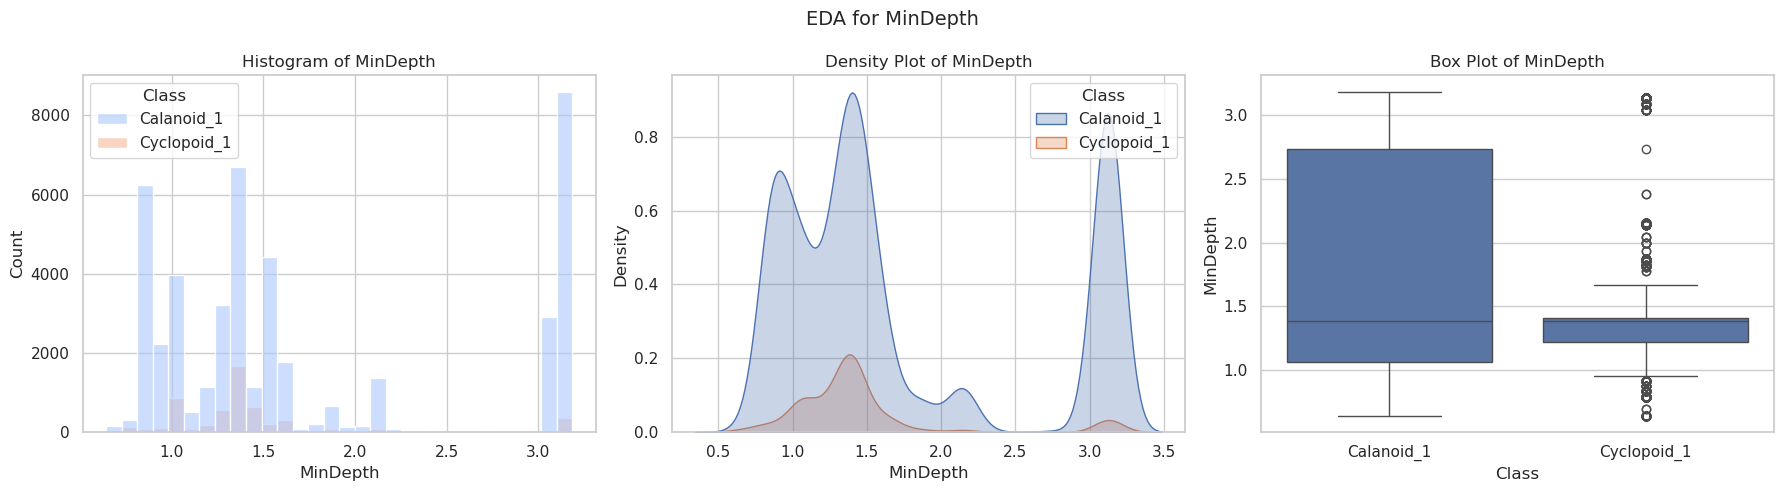

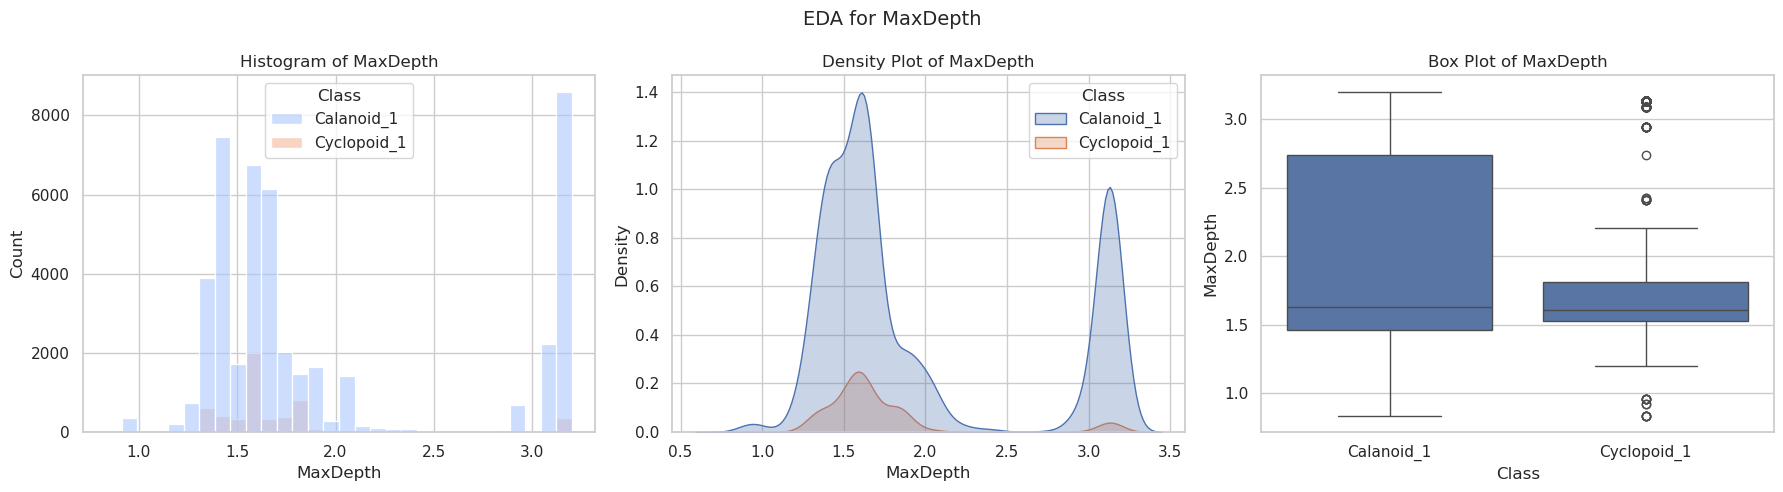

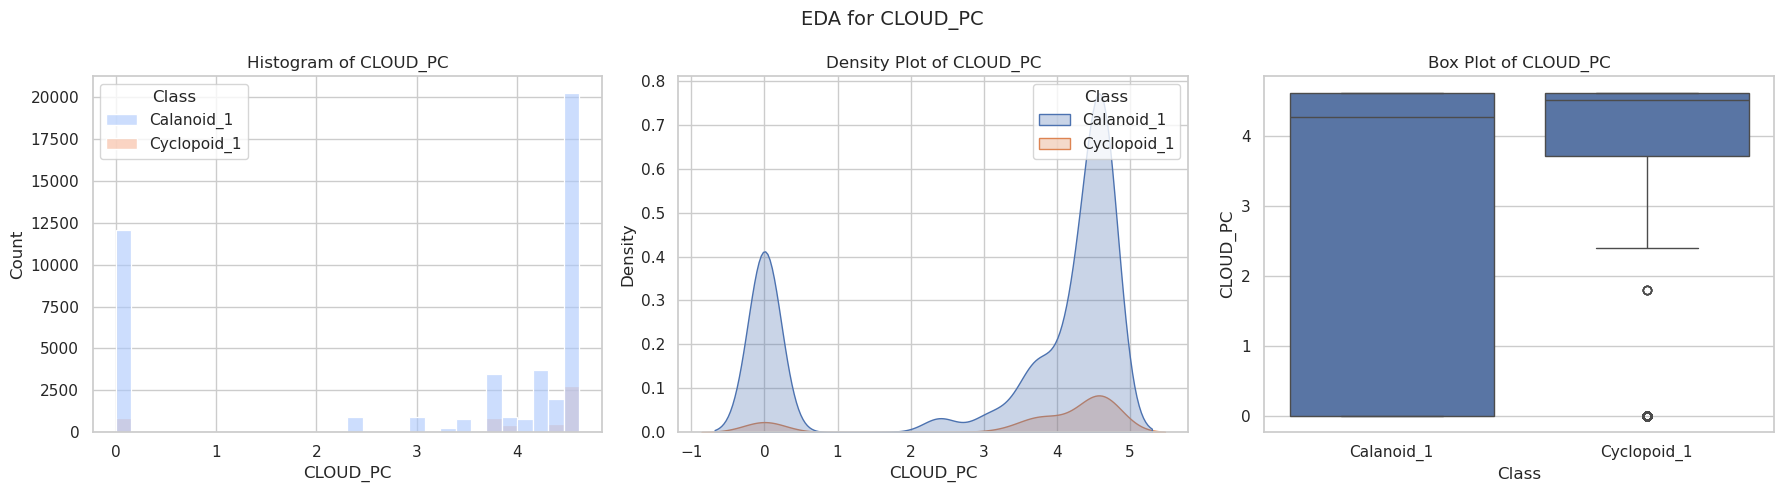

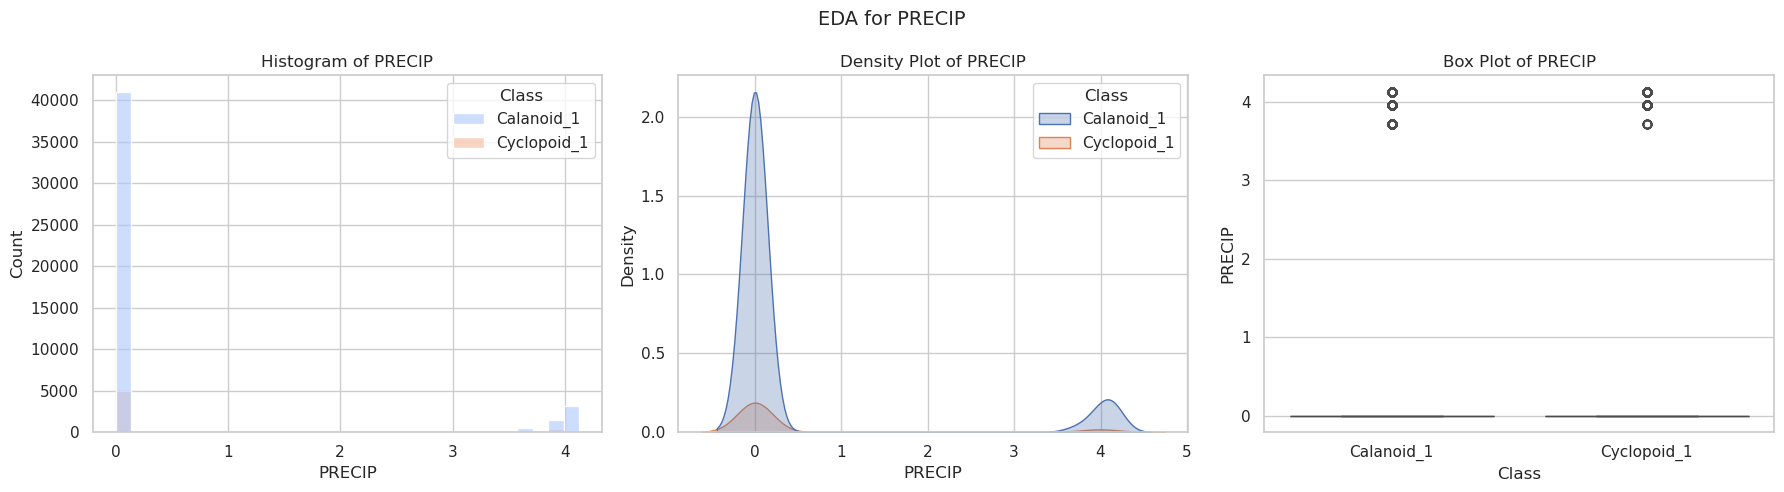

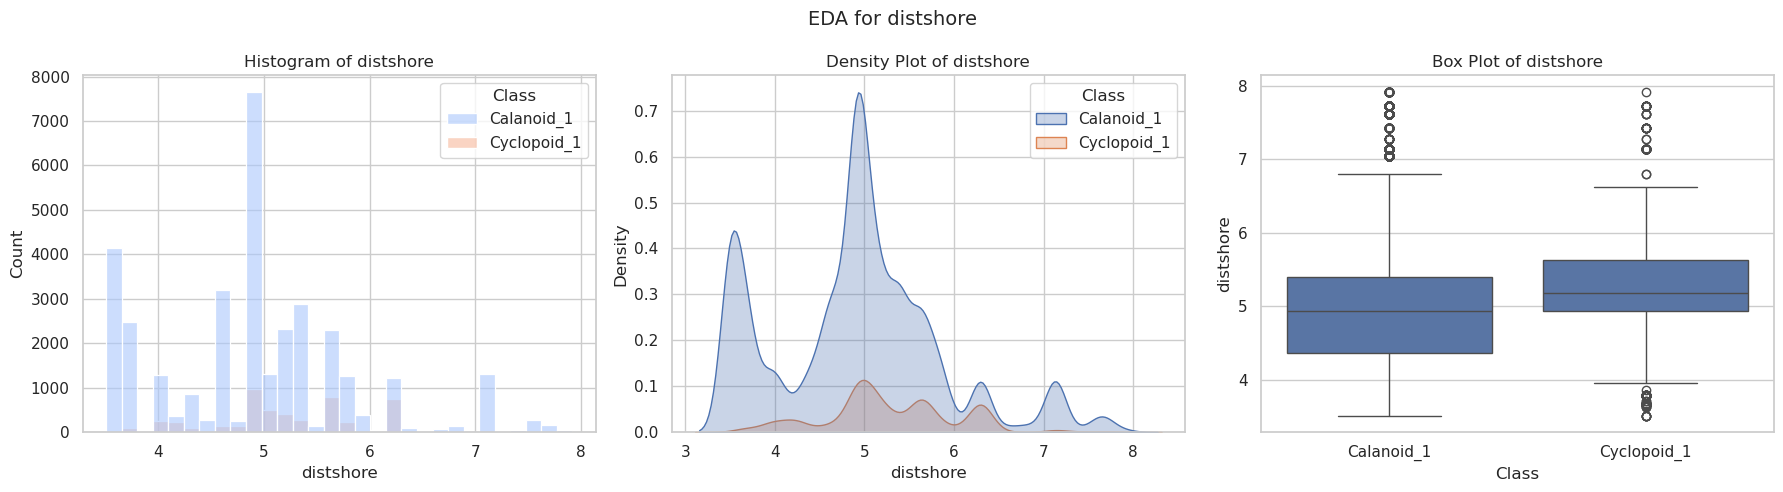

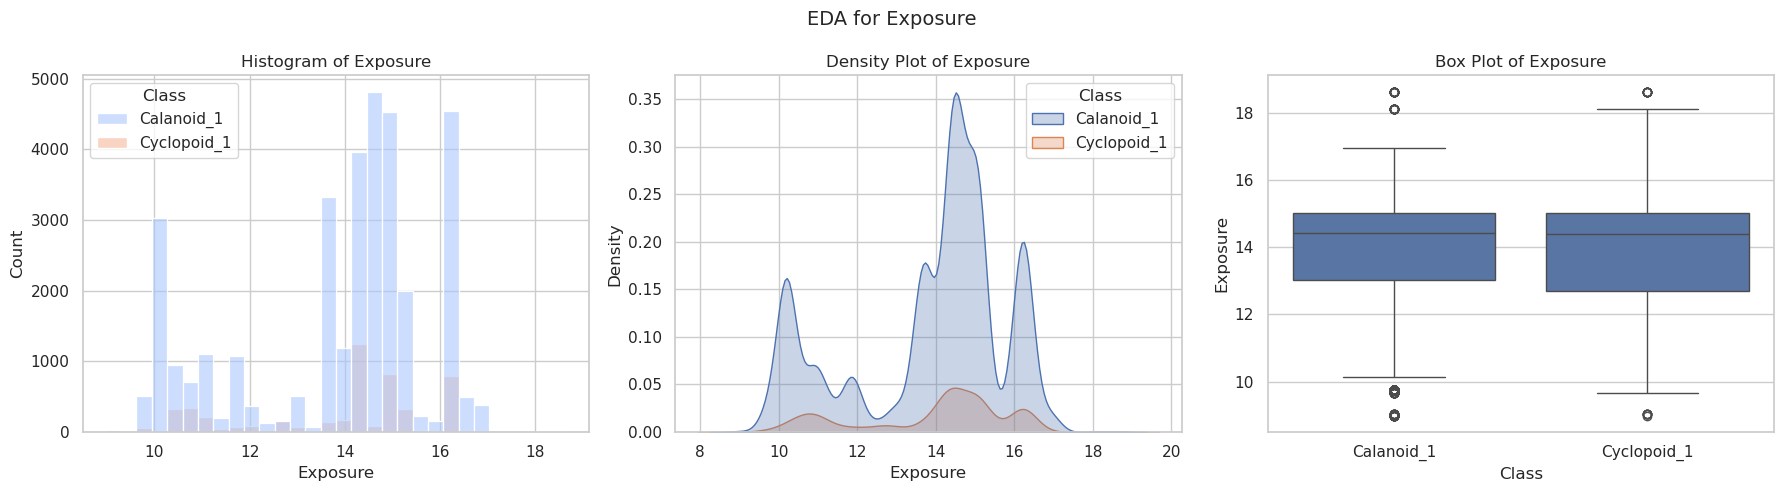

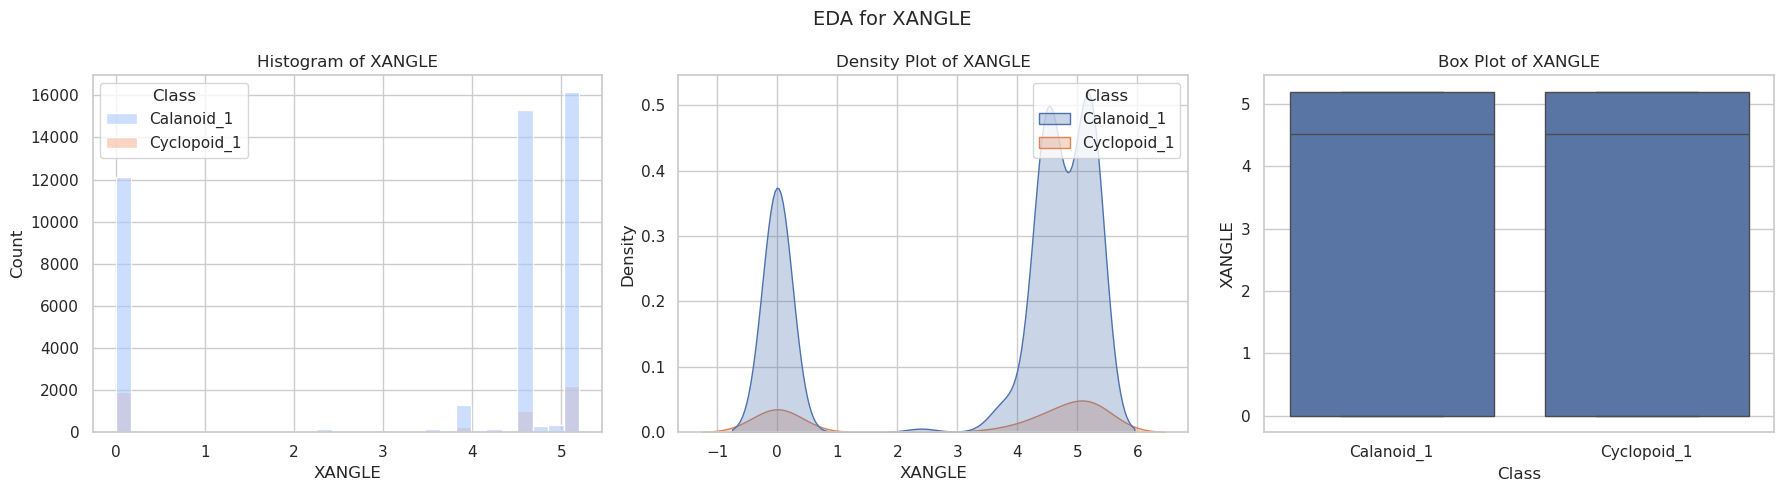

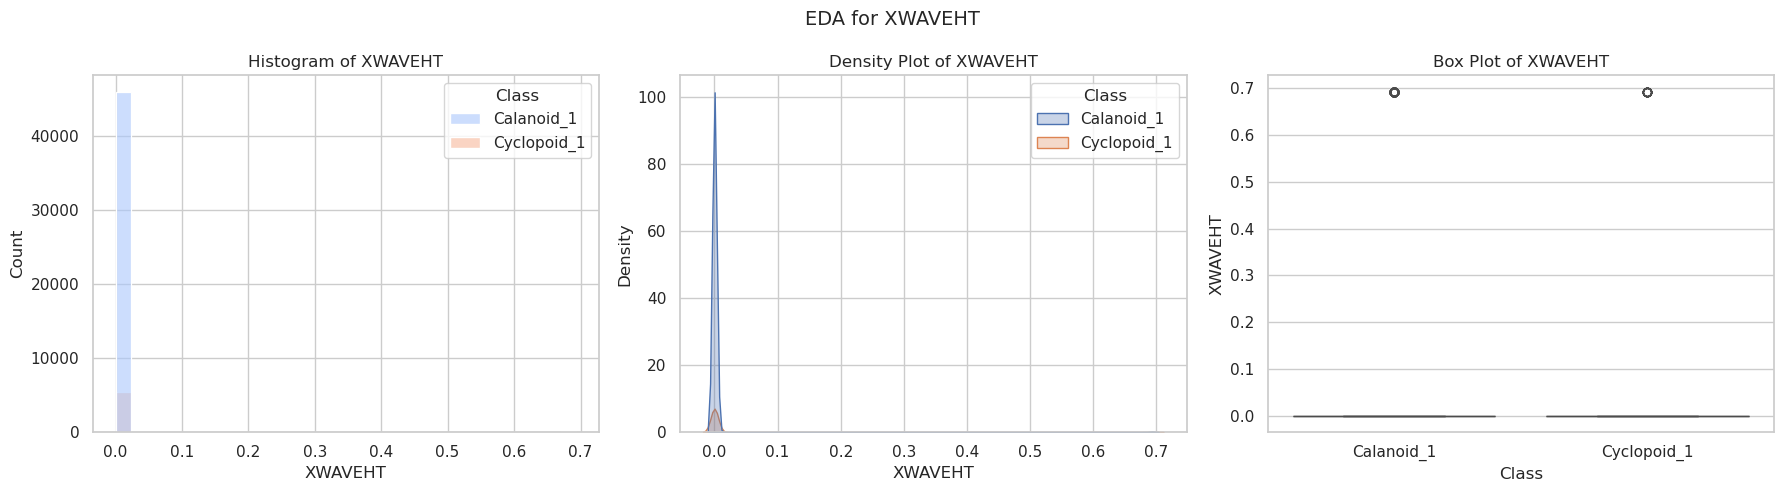

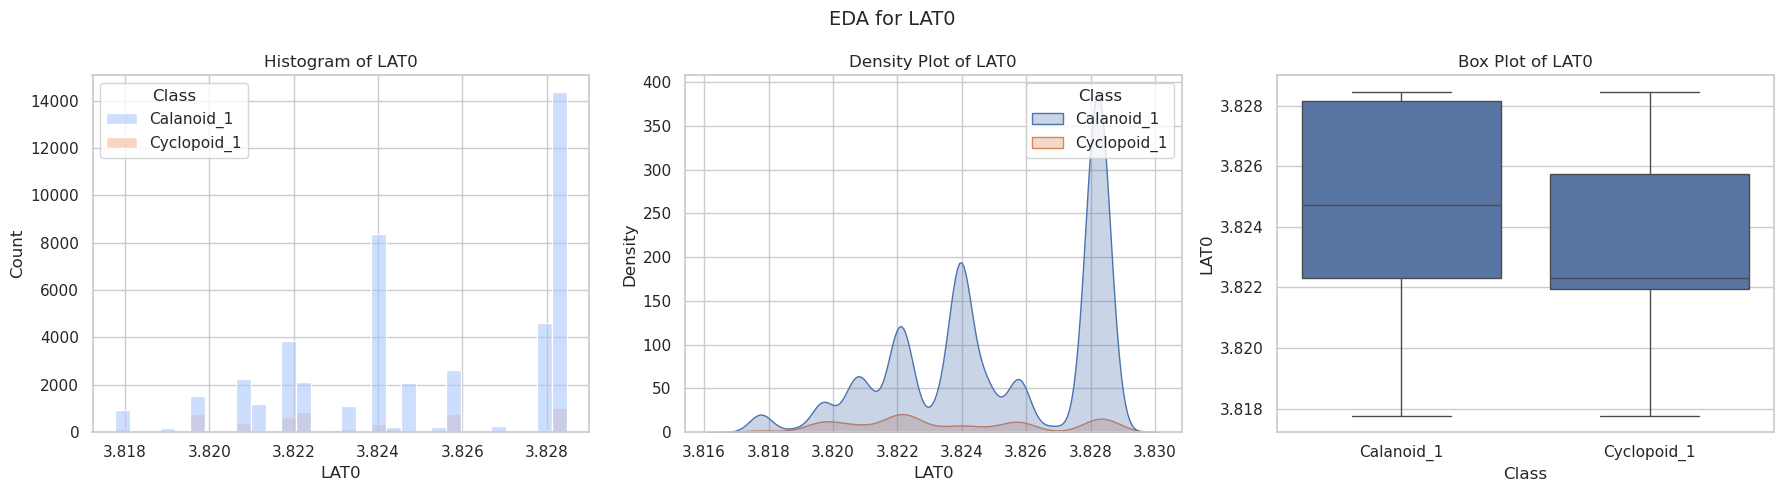

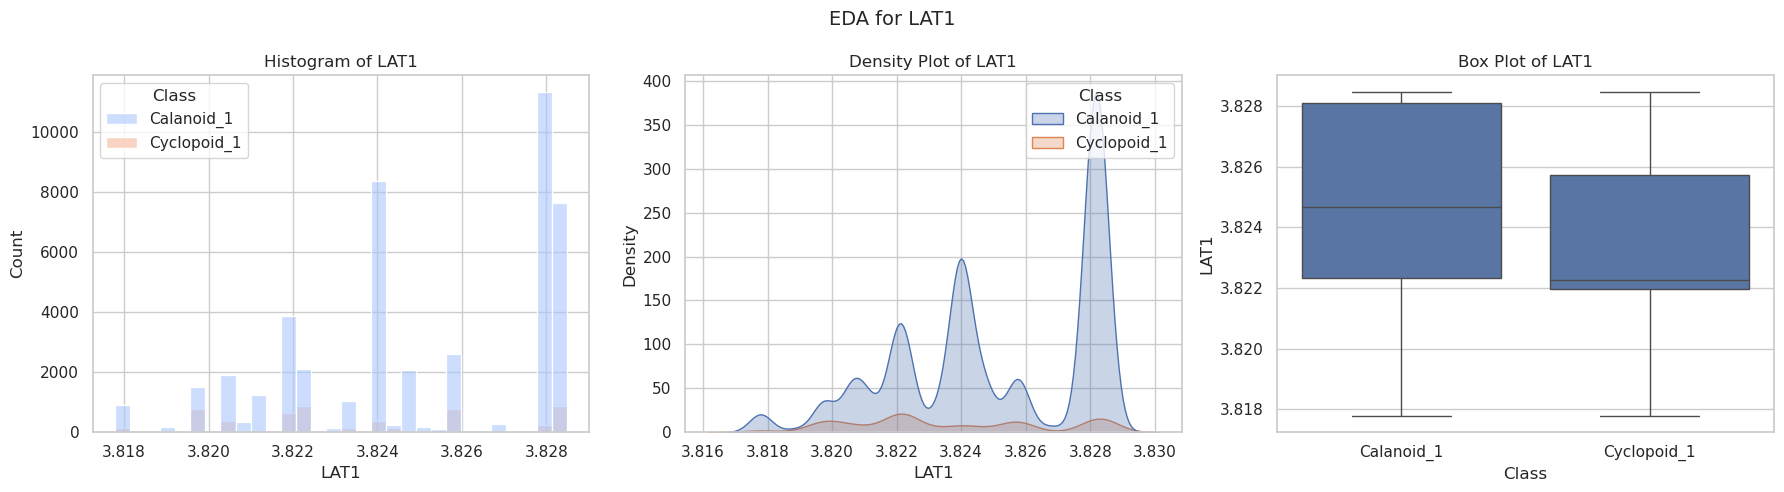

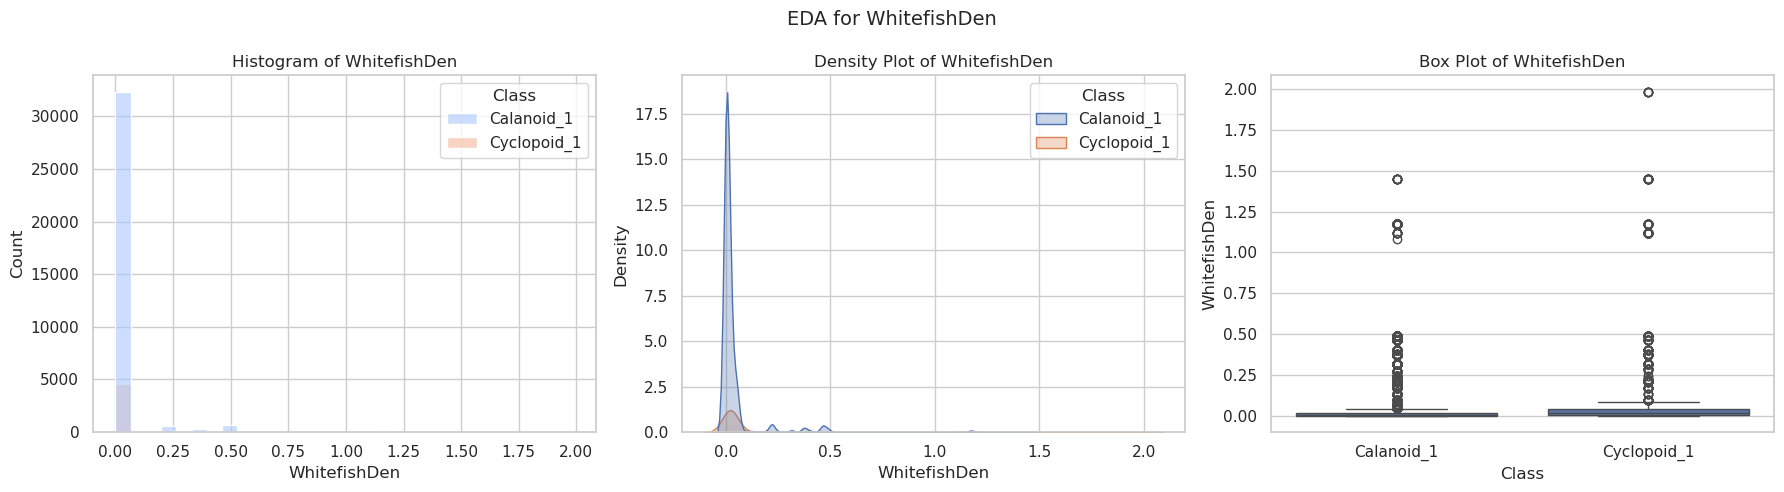

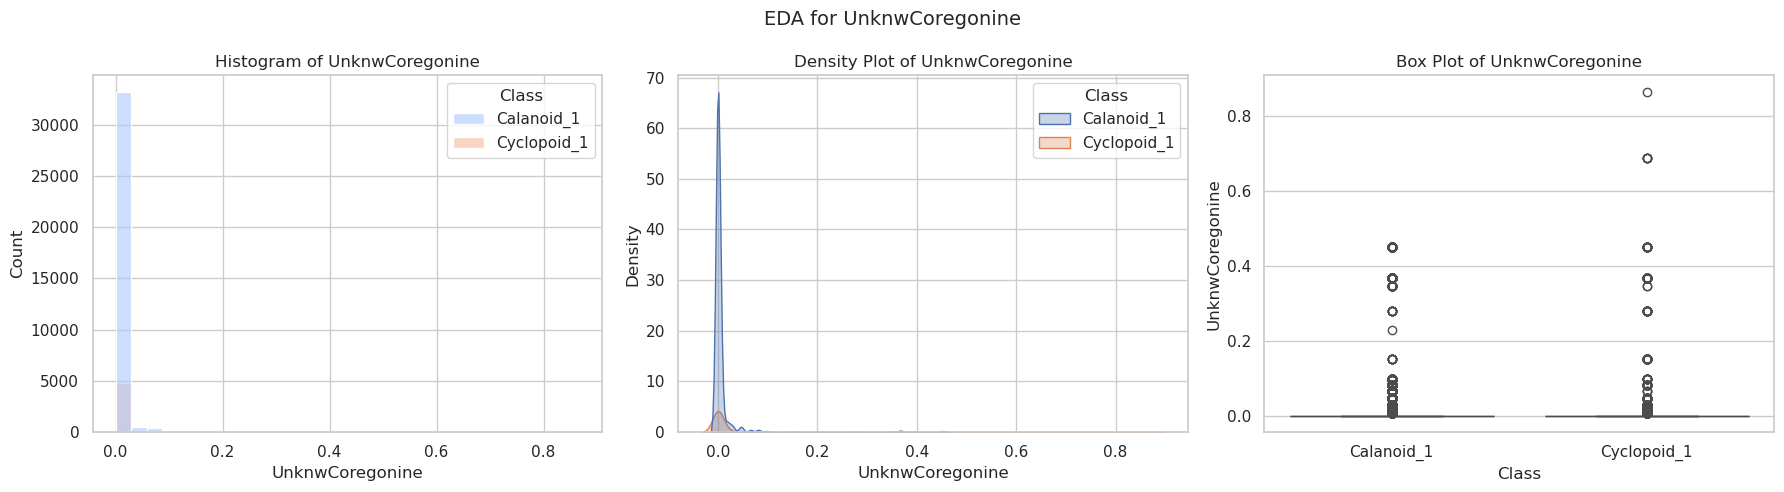

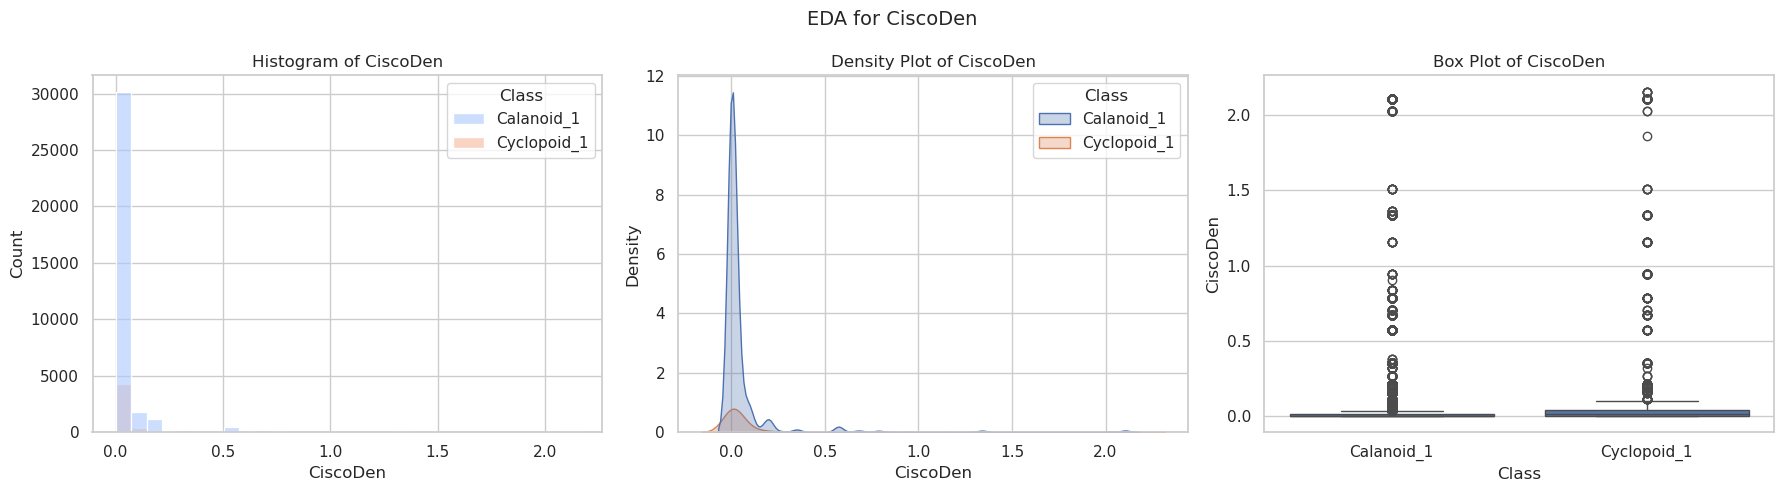

In [4]:
file_path = "HURON_Predictor_Selection_Dataset.csv"
df = pd.read_csv(file_path)

df_log = df.copy()
for feature in sum_features_drop:
    if np.issubdtype(df[feature].dtype, np.number): 
        df_log[feature] = np.log1p(df[feature]) 
    else:
        print(f"skip log transform for non-numerical variable")

sns.set(style="whitegrid")

for feature in sum_features_drop:
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(f"EDA for {feature}", fontsize=14)

    # Histogram
    sns.histplot(data=df_log, x=feature, hue="Class", bins=30, kde=False, ax=axes[0], palette="coolwarm", alpha=0.6)
    axes[0].set_title(f"Histogram of {feature}")

    # Density Plot
    sns.kdeplot(data=df_log, x=feature, hue="Class", ax=axes[1], fill=True, alpha=0.3)
    axes[1].set_title(f"Density Plot of {feature}")

    # Box Plot
    sns.boxplot(data=df_log, x="Class", y=feature, ax=axes[2])
    axes[2].set_title(f"Box Plot of {feature}")

    plt.tight_layout()
    plt.show()


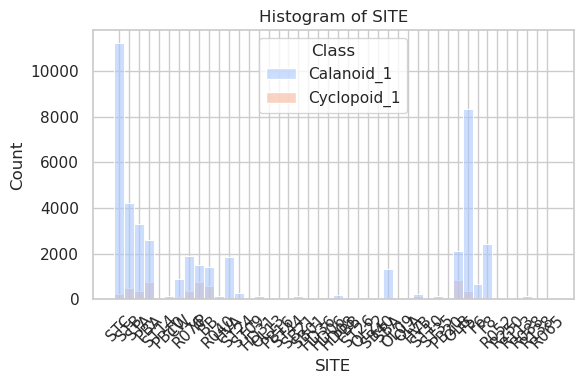

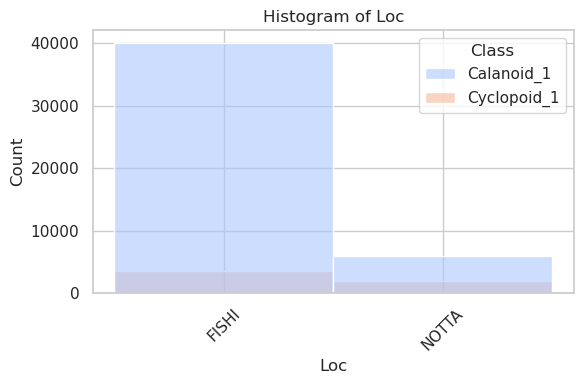

In [3]:
file_path = "HURON_Predictor_Selection_Dataset.csv"
df = pd.read_csv(file_path)

sns.set(style="whitegrid")

plot_features_cat = ['SITE', 'Loc']

for feature in plot_features_cat:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=feature, hue="Class", bins=30, kde=False, palette="coolwarm", alpha=0.6)
    plt.title(f"Histogram of {feature}")
    plt.xticks(rotation=45)  
    plt.tight_layout()
    plt.show()


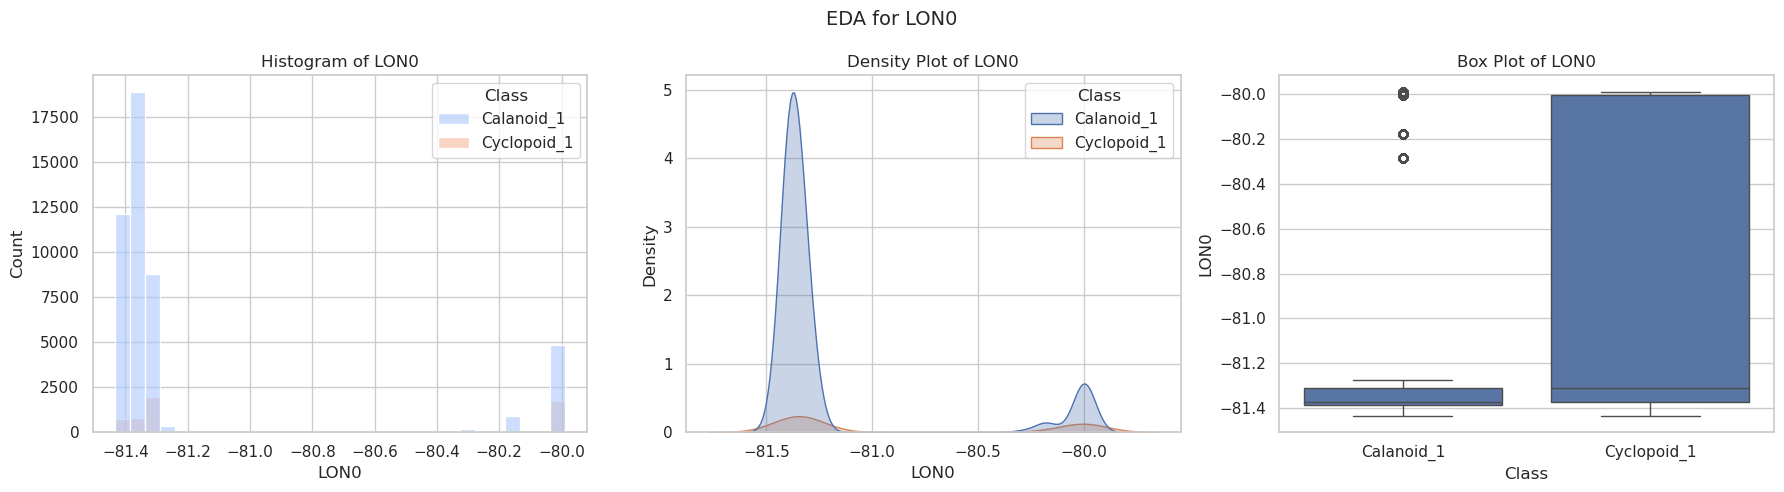

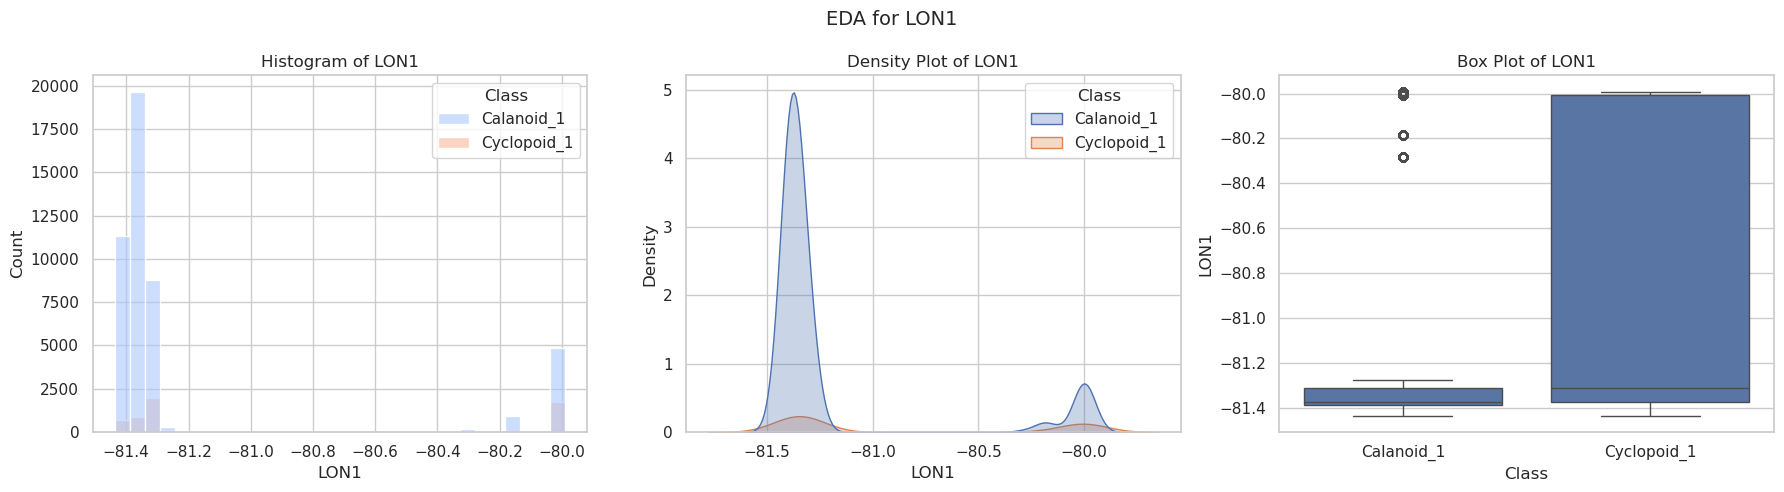

In [2]:
file_path = "HURON_Predictor_Selection_Dataset.csv"
df = pd.read_csv(file_path)

plot_features_num = ['LON0', 'LON1']
sns.set(style="whitegrid")

for feature in plot_features_num:
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(f"EDA for {feature}", fontsize=14)

    # Histogram
    sns.histplot(data=df, x=feature, hue="Class", bins=30, kde=False, ax=axes[0], palette="coolwarm", alpha=0.6)
    axes[0].set_title(f"Histogram of {feature}")

    # Density Plot
    sns.kdeplot(data=df, x=feature, hue="Class", ax=axes[1], fill=True, alpha=0.3)
    axes[1].set_title(f"Density Plot of {feature}")

    # Box Plot（
    sns.boxplot(data=df, x="Class", y=feature, ax=axes[2])
    axes[2].set_title(f"Box Plot of {feature}")

    plt.tight_layout()
    plt.show()


# Analysis Summary

In [7]:
file_path = 'HURON_Predictor_Selection_Dataset.csv'
df = pd.read_csv(file_path)

class_column = 'Class' 

class_distribution = df[class_column].value_counts()

print("Class Distribution:")
print(class_distribution)

Class Distribution:
Class
Calanoid_1     45964
Cyclopoid_1     5465
Name: count, dtype: int64
